In [ ]:
#1 objective = energy purchase kWhr x electrict tariff
#2 objective = overall LF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams['figure.figsize'] = 20, 10
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 22})
from math import isnan


In [2]:
def connectpoints(x,y,x_mean,y_mean,color):
#     x1, x2 = x[p1], x[p2]
#     y1, y2 = y[p1], y[p2]
#     plt.plot([x1,x2],[y1,y2],'k-')
    for x_value, y_value in zip(x,y):
        plt.plot([x_value,x_mean],[y_value,y_mean],color=color)

# working day

In [3]:
#tariff rate: off-peak (0.00-9.00, 22.00-24.00) = 2.6295
# peak (9.00 -22.00 )=4.2097
#energy charge = 132.93 THB/kW
array_tarrif=np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])

dict_AMR_MC=np.load('dict_MC_AMR_working_day.npy')[()]

dict_tarrif={}
for AMR_id in list(dict_AMR_MC.keys()):
    dict_tarrif.update({AMR_id:np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])})

In [26]:
size_of_MC=100

In [27]:
np.empty((size_of_MC, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [32]:
array_sub_cost=np.array([[] for x in np.arange(0,100,1)])

In [33]:
np.shape(array_sub_cost)


(100, 1, 0)

In [36]:
print(array_sub_cost)

[]


In [13]:
array_sub_cost=([[],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[]])

In [15]:
np.shape(array_sub_cost)

(20, 0)

/Users/pornchaichaweewat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars


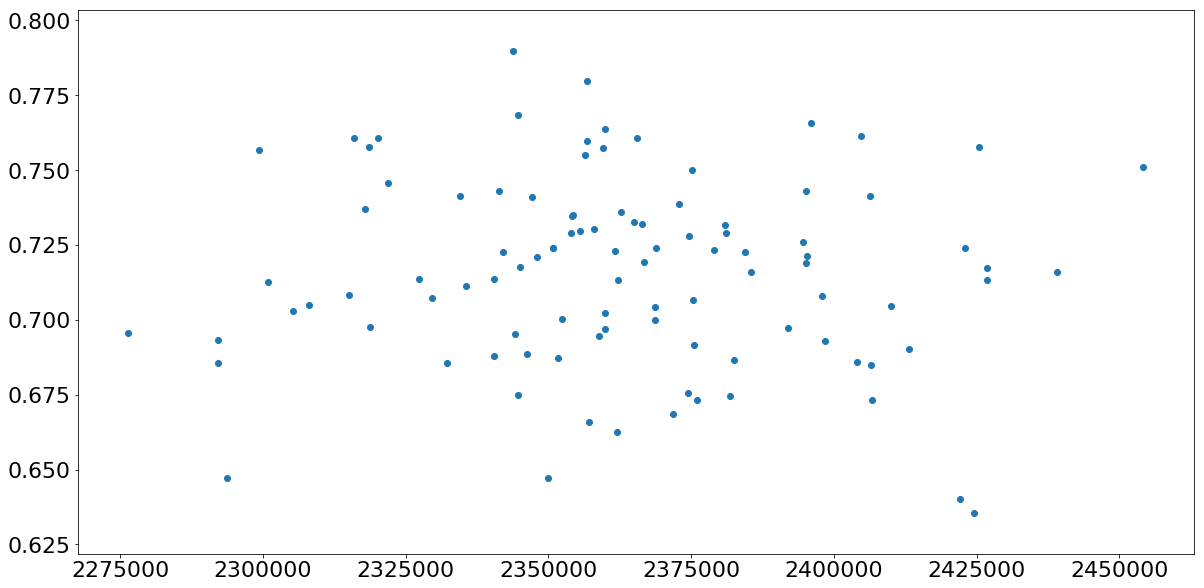

In [45]:
dict_AMR_MC=np.load('dict_MC_AMR_working_day.npy')[()]
dict_AMR_avg_cost_LF_working_day={}

#energy purchasing
array_sub_cost=([
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[]])
for AMR_id in list(dict_AMR_MC.keys()):
#     print('AMR id:', AMR_id)
    array_kW=np.array([
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[]])
    array_LF=np.array([])
    for t in list(dict_AMR_MC[AMR_id].keys()):
#         print(dict_AMR_MC[AMR_id][t])
        kW_data=np.array([[dict_AMR_MC[AMR_id][t][sample]] for sample in np.arange(0,size_of_MC,1)])
        array_kW=np.append(array_kW, kW_data, axis=1)

    LF_data=np.array([x.mean()/x.max() for x in array_kW])
    array_AMR_cost=array_kW*dict_tarrif[AMR_id]

    dict_AMR_avg_cost_LF_working_day.update({AMR_id:{'cost':array_AMR_cost.sum(axis=1), 'LF':LF_data, 
                                         "avg_cost":array_AMR_cost.sum(axis=1).sum()/size_of_MC, "avg_LF":LF_data.mean() }})

    array_sub_cost=np.append(array_sub_cost, np.array([[x] for x in array_AMR_cost.sum(axis=1)]), axis=1)
array_sub_cost=np.array([x.sum() for x in array_sub_cost])


del dict_AMR_avg_cost_LF_working_day[42422]

#find substation LF
array_sub_LF=np.array([])
for sample in np.arange(0,size_of_MC,1):
    array_sum_kW=np.array([])
    for t in ['t{}'.format(x) for x in np.arange(0,48,1)]:
        array_AMR_kW=np.array([dict_AMR_MC[AMR_id][t][sample] for AMR_id in list(dict_AMR_MC.keys())])
        array_sum_kW=np.append(array_sum_kW,array_AMR_kW.sum())
    LF=array_sum_kW.mean()/array_sum_kW.max()
    array_sub_LF=np.append(array_sub_LF,LF)

fig, ax = plt.subplots()
ax.scatter(array_sub_cost,array_sub_LF)
plt.show()



In [46]:
size_of_MC

100

In [47]:
# dict_AMR_avg_cost_LF

In [48]:
for key1 in list(dict_AMR_avg_cost_LF_working_day.keys()):
    dict_AMR_avg_cost_LF_working_day[key1].update({'max_cost':dict_AMR_avg_cost_LF_working_day[key1]['cost'].max(),
                                      'min_cost':dict_AMR_avg_cost_LF_working_day[key1]['cost'].min(),
                                      'sd_cost':np.std(dict_AMR_avg_cost_LF_working_day[key1]['cost']),
                                      'max_LF':dict_AMR_avg_cost_LF_working_day[key1]['LF'].max(),
                                      'min_LF':dict_AMR_avg_cost_LF_working_day[key1]['LF'].min(),
                                      'sd_LF':np.std(dict_AMR_avg_cost_LF_working_day[key1]['LF'])})

In [49]:


# for AMR_id in list(dict_AMR_avg_cost_LF.keys()):
#     print(AMR_id, '&','&','&', 
# #           '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['min_cost']), '&',
# #          '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['max_cost']),'&',
#          '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['avg_cost']),'&',
#          '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['sd_cost']), '\\', '\\')

In [50]:
# for AMR_id in list(dict_AMR_avg_cost_LF.keys()):
#     print(AMR_id,'&','&', '&', 
# #           '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['min_LF']), '&',
# #          '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['max_LF']),'&',
#          '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['avg_LF']),'&',
#          '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['sd_LF']), '\\', '\\')

In [51]:
dict_AMR_raw=np.load('AMR_dict.npy')[()]

In [52]:
for AMR_id in list(dict_AMR_avg_cost_LF_working_day.keys()):
    print(AMR_id, '&',
          '{:,.0f}'.format(dict_AMR_raw[AMR_id]['working_day']['cost'].mean()),'&',
          '{:,.0f}'.format(dict_AMR_raw[AMR_id]['working_day']['cost'].std()),'&',
#           '{:,.0f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['min_cost']), '&',
#          '{:,.0f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['max_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['avg_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['sd_cost']), '\\', '\\')

21652 & 75,139 & 14,264 & 76,892 & 10,218 \ \
136898 & 153,630 & 23,736 & 157,316 & 10,278 \ \
137091 & 34,053 & 9,608 & 35,667 & 3,877 \ \
137138 & 33,384 & 16,728 & 33,851 & 3,796 \ \
42432 & 236,816 & 44,446 & 238,122 & 11,708 \ \
66543 & 12,456 & 2,569 & 12,862 & 988 \ \
21654 & 6,795 & 6,970 & 8,569 & 1,757 \ \
42421 & 67,473 & 11,738 & 67,079 & 4,227 \ \
42423 & 5,743 & 3,470 & 7,052 & 2,177 \ \
43958 & 70,504 & 16,975 & 69,123 & 5,393 \ \
137110 & 11,973 & 2,166 & 13,175 & 831 \ \
21655 & 5,579 & 1,591 & 5,499 & 550 \ \
42431 & 12,357 & 3,402 & 12,471 & 1,035 \ \
44834 & 63,665 & 11,412 & 63,853 & 3,009 \ \
56452 & 213,943 & 35,413 & 213,531 & 9,611 \ \
56457 & 36,415 & 4,492 & 35,973 & 1,457 \ \
56458 & 28,128 & 3,577 & 28,080 & 1,009 \ \
124642 & 65,564 & 9,881 & 65,013 & 2,422 \ \
124647 & 56,148 & 8,723 & 56,480 & 2,396 \ \
124649 & 241,325 & 39,482 & 240,136 & 9,263 \ \
124656 & 57,745 & 7,114 & 58,237 & 2,383 \ \
124683 & 15,237 & 2,342 & 15,143 & 741 \ \
185767 & 22,119 &

In [53]:
for AMR_id in list(dict_AMR_avg_cost_LF_working_day.keys()):
    print(AMR_id, '&',
          '{:,.3f}'.format(dict_AMR_raw[AMR_id]['working_day']['LF'].mean()),'&',
          '{:,.3f}'.format(dict_AMR_raw[AMR_id]['working_day']['LF'].std()),'&',
#           '{:,.0f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['min_cost']), '&',
#          '{:,.0f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['max_cost']),'&',
         '{:,.3f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['avg_LF']),'&',
         '{:,.3f}'.format(dict_AMR_avg_cost_LF_working_day[AMR_id]['sd_LF']), '\\', '\\')

21652 & 0.458 & 0.078 & 0.441 & 0.063 \ \
136898 & 0.595 & 0.080 & 0.427 & 0.060 \ \
137091 & 0.403 & 0.098 & 0.266 & 0.052 \ \
137138 & 0.459 & 0.084 & 0.307 & 0.046 \ \
42432 & 0.551 & 0.057 & 0.438 & 0.042 \ \
66543 & 0.396 & 0.051 & 0.328 & 0.047 \ \
21654 & 0.332 & 0.110 & 0.197 & 0.037 \ \
42421 & 0.455 & 0.046 & 0.370 & 0.035 \ \
42423 & 0.227 & 0.111 & 0.108 & 0.054 \ \
43958 & 0.753 & 0.175 & 0.694 & 0.054 \ \
137110 & 0.523 & 0.080 & 0.395 & 0.086 \ \
21655 & 0.408 & 0.091 & 0.261 & 0.052 \ \
42431 & 0.482 & 0.090 & 0.341 & 0.046 \ \
44834 & 0.569 & 0.090 & 0.503 & 0.060 \ \
56452 & 0.620 & 0.089 & 0.547 & 0.049 \ \
56457 & 0.567 & 0.060 & 0.518 & 0.053 \ \
56458 & 0.621 & 0.083 & 0.556 & 0.052 \ \
124642 & 0.583 & 0.059 & 0.528 & 0.050 \ \
124647 & 0.543 & 0.063 & 0.456 & 0.051 \ \
124649 & 0.655 & 0.061 & 0.557 & 0.057 \ \
124656 & 0.592 & 0.082 & 0.505 & 0.069 \ \
124683 & 0.520 & 0.071 & 0.444 & 0.066 \ \
185767 & 0.561 & 0.089 & 0.425 & 0.059 \ \
56448 & 0.571 & 0.051 & 

# Non working day

In [9]:
#tariff rate: off-peak (0.00-9.00, 22.00-24.00) = 2.6295
# peak (9.00 -22.00 )=4.2097
#energy charge = 132.93 THB/kW
array_tarrif=np.array([2.6295 for x in np.arange(0,18,1)]+[2.6295 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])

In [10]:
dict_AMR_MC=np.load('dict_MC_AMR_non_working_day.npy')[()]



In [11]:
dict_tarrif={}
for AMR_id in list(dict_AMR_MC.keys()):
    dict_tarrif.update({AMR_id:np.array([2.6295 for x in np.arange(0,18,1)]+[2.6295 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])})

/Users/pornchaichaweewat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


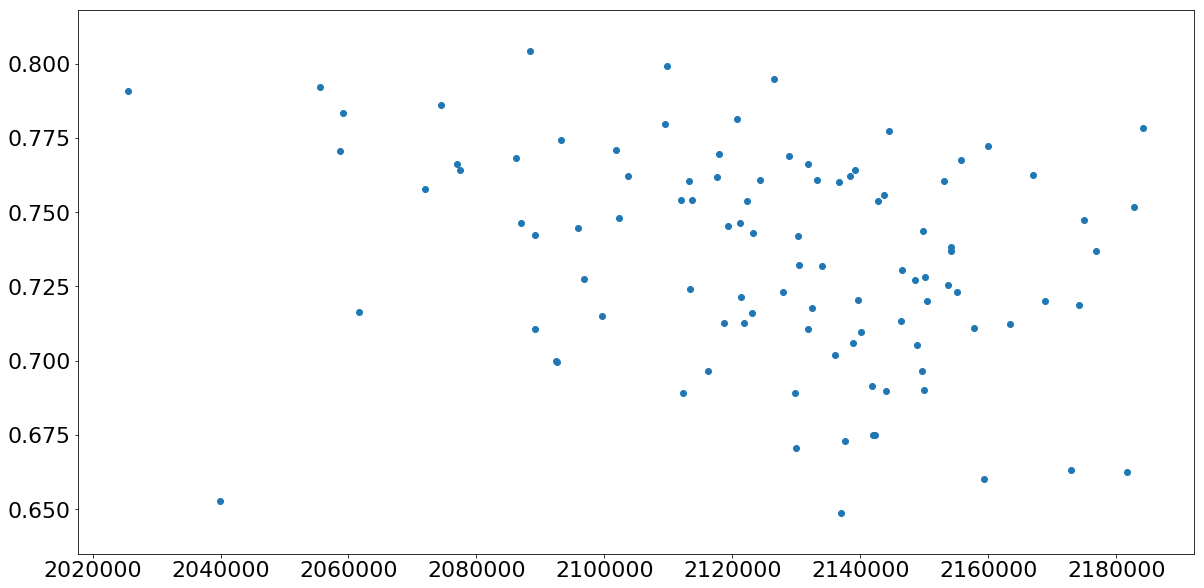

In [54]:
dict_AMR_MC=np.load('dict_MC_AMR_non_working_day.npy')[()]
dict_AMR_avg_cost_LF_non_working_day={}

#energy purchasing
array_sub_cost=([
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[]])
for AMR_id in list(dict_AMR_MC.keys()):
#     print('AMR id:', AMR_id)
    array_kW=np.array([
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[],
    [],[],[],[],[]])
    array_LF=np.array([])
    for t in list(dict_AMR_MC[AMR_id].keys()):
        kW_data=np.array([[dict_AMR_MC[AMR_id][t][sample]] for sample in np.arange(0,size_of_MC,1)])
        array_kW=np.append(array_kW, kW_data, axis=1)

    LF_data=np.array([x.mean()/x.max() for x in array_kW])
    array_AMR_cost=array_kW*dict_tarrif[AMR_id]

    dict_AMR_avg_cost_LF_non_working_day.update({AMR_id:{'cost':array_AMR_cost.sum(axis=1), 'LF':LF_data, 
                                         "avg_cost":array_AMR_cost.sum(axis=1).sum()/size_of_MC, "avg_LF":LF_data.mean() }})

    array_sub_cost=np.append(array_sub_cost, np.array([[x] for x in array_AMR_cost.sum(axis=1)]), axis=1)
array_sub_cost=np.array([x.sum() for x in array_sub_cost])


del dict_AMR_avg_cost_LF_non_working_day[42422]

#find substation LF
array_sub_LF=np.array([])
for sample in np.arange(0,size_of_MC,1):
    array_sum_kW=np.array([])
    for t in ['t{}'.format(x) for x in np.arange(0,48,1)]:
        array_AMR_kW=np.array([dict_AMR_MC[AMR_id][t][sample] for AMR_id in list(dict_AMR_MC.keys())])
        array_sum_kW=np.append(array_sum_kW,array_AMR_kW.sum())
    LF=array_sum_kW.mean()/array_sum_kW.max()
    array_sub_LF=np.append(array_sub_LF,LF)

fig, ax = plt.subplots()
ax.scatter(array_sub_cost,array_sub_LF)
plt.show()

In [55]:
for key1 in list(dict_AMR_avg_cost_LF_non_working_day.keys()):
    dict_AMR_avg_cost_LF_non_working_day[key1].update({'max_cost':dict_AMR_avg_cost_LF_non_working_day[key1]['cost'].max(),
                                      'min_cost':dict_AMR_avg_cost_LF_non_working_day[key1]['cost'].min(),
                                      'sd_cost':np.std(dict_AMR_avg_cost_LF_non_working_day[key1]['cost']),
                                      'max_LF':dict_AMR_avg_cost_LF_non_working_day[key1]['LF'].max(),
                                      'min_LF':dict_AMR_avg_cost_LF_non_working_day[key1]['LF'].min(),
                                      'sd_LF':np.std(dict_AMR_avg_cost_LF_non_working_day[key1]['LF'])})

In [56]:
dict_AMR_raw=np.load('AMR_dict.npy')[()]

In [57]:
dict_AMR_raw[21652]['non_working_day']['cost']

array([45521.3160493 , 35306.39688495, 42803.13815672, 34354.83671584,
       51035.79197166, 34410.26826308, 46566.5815085 , 37350.36671729,
       48001.42277964, 38884.09065924, 60938.53098137, 37392.96966928,
       53427.42380336, 39145.82227472, 60058.87102448, 53154.96635136,
       63409.66122908, 49187.71443538, 59068.18894093, 49196.65557752,
       59196.15682908, 47133.38984158, 58742.01395511, 51328.55253102,
       54935.66725722, 55649.75705229, 55211.6587575 , 32532.23966764,
       35981.55913823, 59369.48422688, 43632.01383985, 21101.18380984,
         600.34645124,  5832.91134245, 45070.86625578, 61335.26324107,
       50249.2541869 , 47790.17504382, 47253.26475917, 53705.94214815,
       43725.36572512, 53228.4568853 , 39157.78502814, 48577.68469186,
       37330.82343031, 34524.01160691, 54314.43458067, 36004.97220808,
       50791.50088444, 42948.51123263, 62655.70736944, 37796.55798264,
       39263.771136  , 43900.38946609, 30079.99890798, 36166.77860849,
      

In [58]:
for AMR_id in list(dict_AMR_avg_cost_LF_non_working_day.keys()):
    print(AMR_id, '&',
          '{:,.0f}'.format(dict_AMR_raw[AMR_id]['non_working_day']['cost'].mean()),'&',
          '{:,.0f}'.format(dict_AMR_raw[AMR_id]['non_working_day']['cost'].std()),'&',
#           '{:,.0f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['min_cost']), '&',
#          '{:,.0f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['max_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['avg_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['sd_cost']), '\\', '\\')

21652 & 46,684 & 13,953 & 63,248 & 10,887 \ \
136898 & 88,504 & 23,363 & 118,712 & 8,972 \ \
137091 & 16,175 & 6,558 & 23,185 & 2,869 \ \
137138 & 22,310 & 10,405 & 31,516 & 3,912 \ \
42432 & 111,394 & 39,088 & 156,110 & 12,386 \ \
66543 & 6,037 & 3,186 & 8,904 & 1,205 \ \
21654 & 3,703 & 4,784 & 7,235 & 1,615 \ \
42421 & 34,754 & 15,783 & 49,539 & 5,419 \ \
42423 & 2,801 & 1,999 & 4,575 & 1,420 \ \
43958 & 51,166 & 13,870 & 67,693 & 5,657 \ \
137110 & 5,338 & 2,315 & 8,704 & 829 \ \
21655 & 2,588 & 1,327 & 3,938 & 458 \ \
42431 & 4,680 & 1,256 & 7,084 & 677 \ \
44834 & 48,884 & 10,888 & 66,167 & 3,174 \ \
56452 & 162,822 & 30,730 & 220,838 & 9,314 \ \
56457 & 28,080 & 4,745 & 37,264 & 1,470 \ \
56458 & 20,586 & 3,358 & 27,162 & 1,144 \ \
124642 & 51,536 & 9,769 & 67,721 & 2,948 \ \
124647 & 43,367 & 7,641 & 57,450 & 2,260 \ \
124649 & 186,633 & 35,706 & 254,889 & 8,918 \ \
124656 & 44,210 & 6,967 & 58,692 & 2,854 \ \
124683 & 12,078 & 2,123 & 15,874 & 860 \ \
185767 & 17,589 & 4,776 &

In [59]:
for AMR_id in list(dict_AMR_avg_cost_LF_non_working_day.keys()):
    print(AMR_id, '&',
          '{:,.3f}'.format(dict_AMR_raw[AMR_id]['non_working_day']['LF'].mean()),'&',
          '{:,.3f}'.format(dict_AMR_raw[AMR_id]['non_working_day']['LF'].std()),'&',
#           '{:,.0f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['min_cost']), '&',
#          '{:,.0f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['max_cost']),'&',
         '{:,.3f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['avg_LF']),'&',
         '{:,.3f}'.format(dict_AMR_avg_cost_LF_non_working_day[AMR_id]['sd_LF']), '\\', '\\')

21652 & 0.389 & 0.102 & 0.383 & 0.065 \ \
136898 & 0.514 & 0.099 & 0.369 & 0.070 \ \
137091 & 0.458 & 0.128 & 0.248 & 0.056 \ \
137138 & 0.428 & 0.087 & 0.285 & 0.041 \ \
42432 & 0.640 & 0.112 & 0.367 & 0.040 \ \
66543 & 0.449 & 0.079 & 0.253 & 0.045 \ \
21654 & 0.356 & 0.116 & 0.185 & 0.035 \ \
42421 & 0.519 & 0.119 & 0.293 & 0.032 \ \
42423 & 0.325 & 0.152 & 0.121 & 0.072 \ \
43958 & 0.738 & 0.173 & 0.683 & 0.057 \ \
137110 & 0.717 & 0.190 & 0.318 & 0.037 \ \
21655 & 0.476 & 0.097 & 0.228 & 0.043 \ \
42431 & 0.465 & 0.080 & 0.320 & 0.071 \ \
44834 & 0.593 & 0.082 & 0.505 & 0.065 \ \
56452 & 0.639 & 0.080 & 0.539 & 0.054 \ \
56457 & 0.603 & 0.049 & 0.525 & 0.048 \ \
56458 & 0.645 & 0.060 & 0.567 & 0.043 \ \
124642 & 0.618 & 0.061 & 0.526 & 0.051 \ \
124647 & 0.591 & 0.060 & 0.503 & 0.064 \ \
124649 & 0.671 & 0.055 & 0.547 & 0.045 \ \
124656 & 0.608 & 0.075 & 0.520 & 0.058 \ \
124683 & 0.574 & 0.074 & 0.486 & 0.067 \ \
185767 & 0.603 & 0.081 & 0.459 & 0.063 \ \
56448 & 0.621 & 0.058 & 

21652


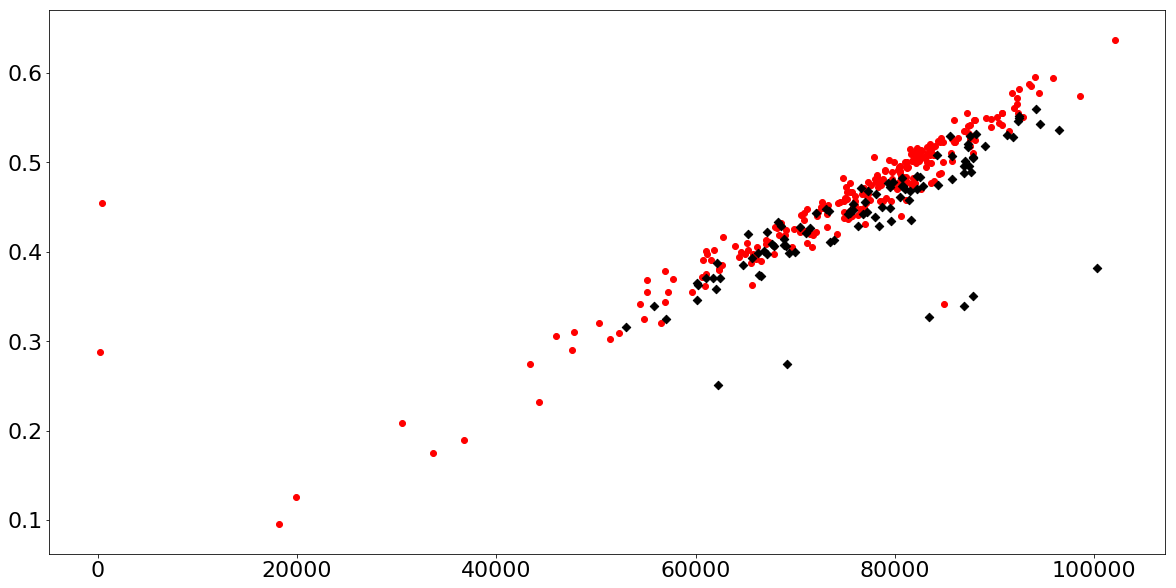

136898


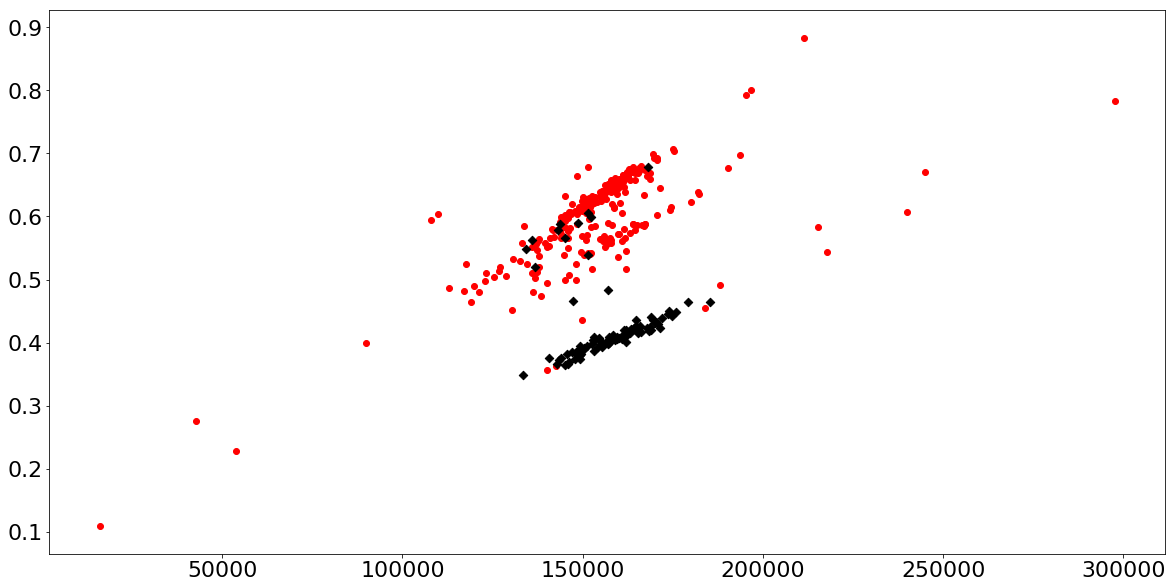

137091


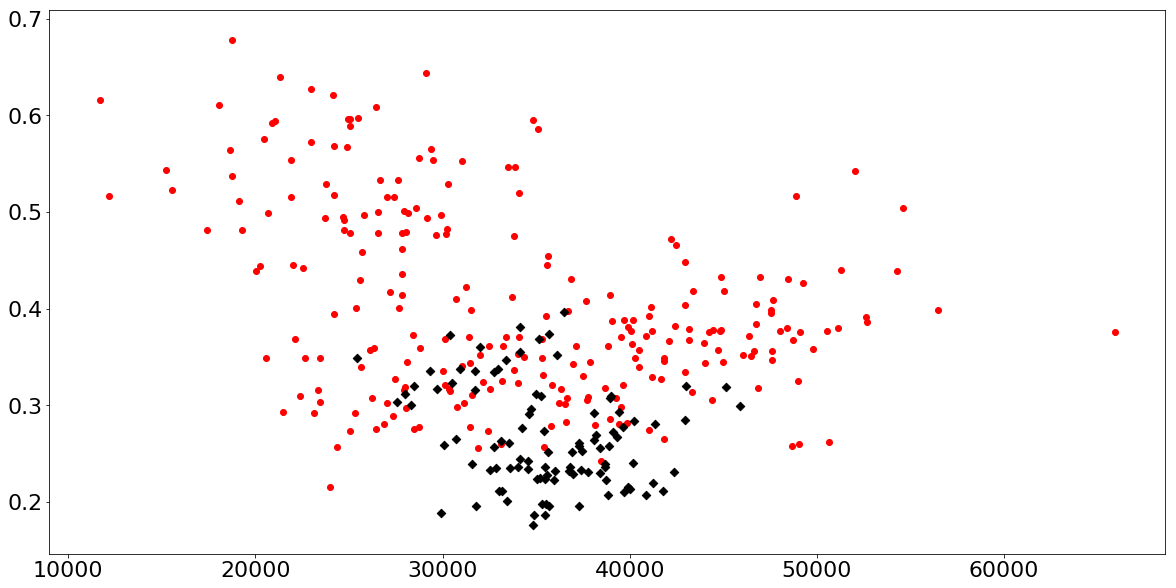

137138


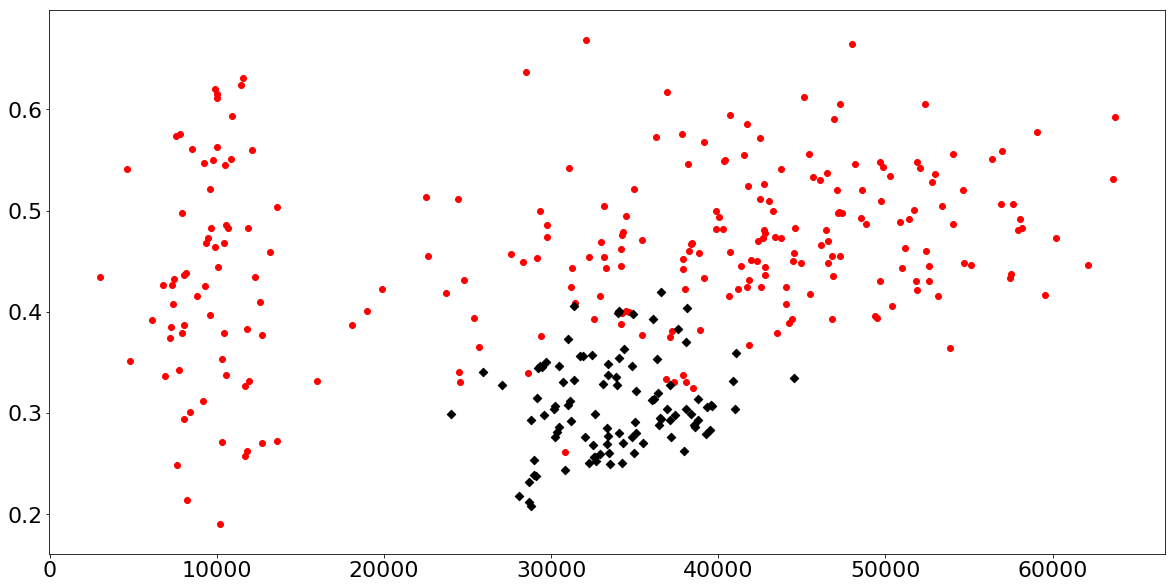

42432


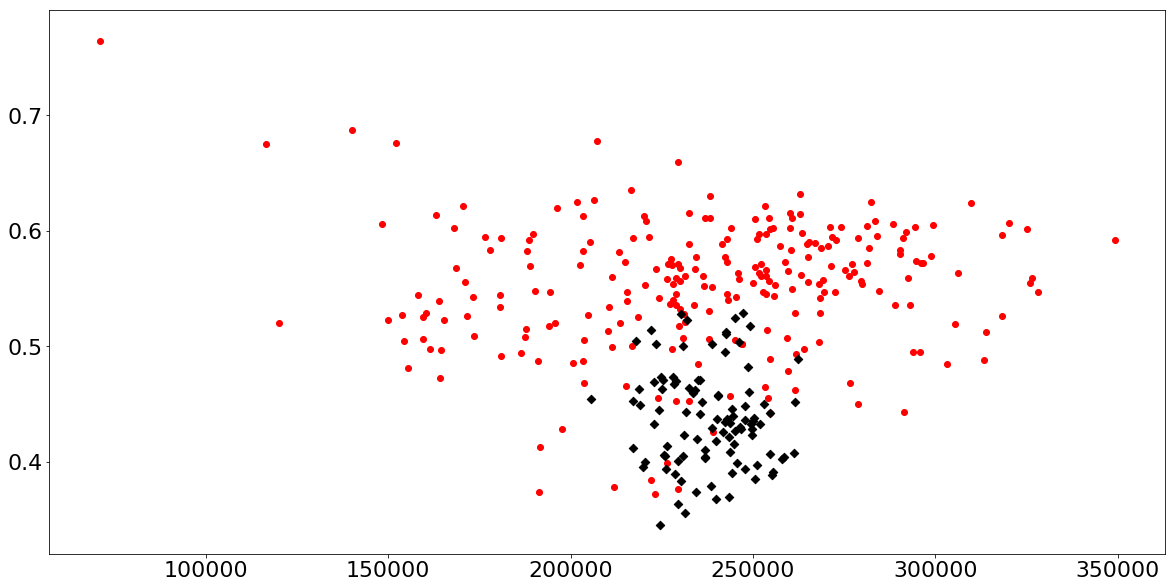

66543


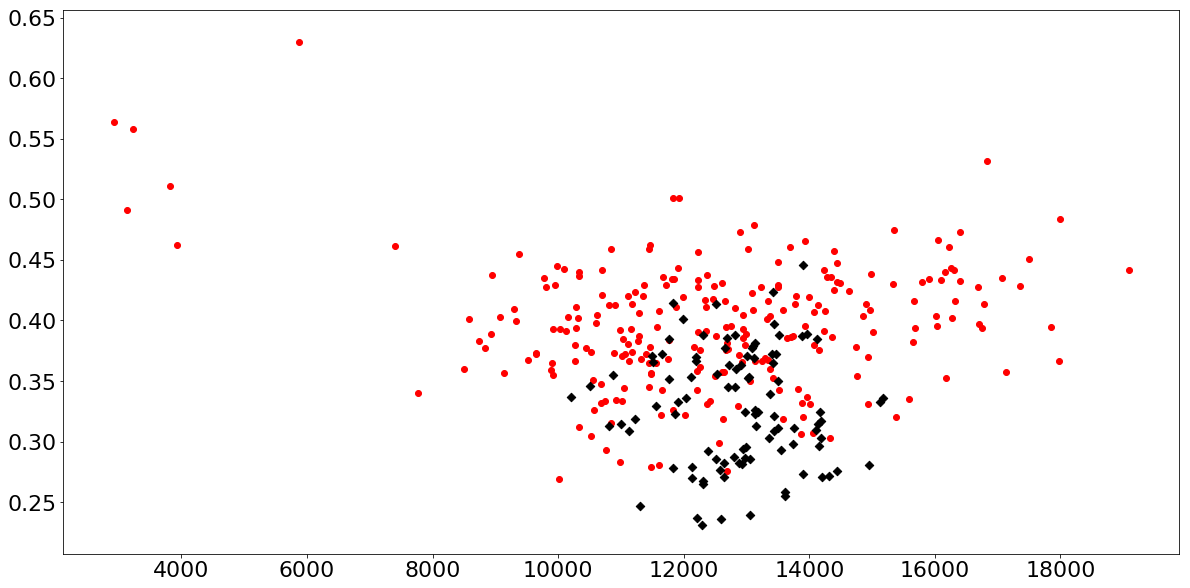

21654


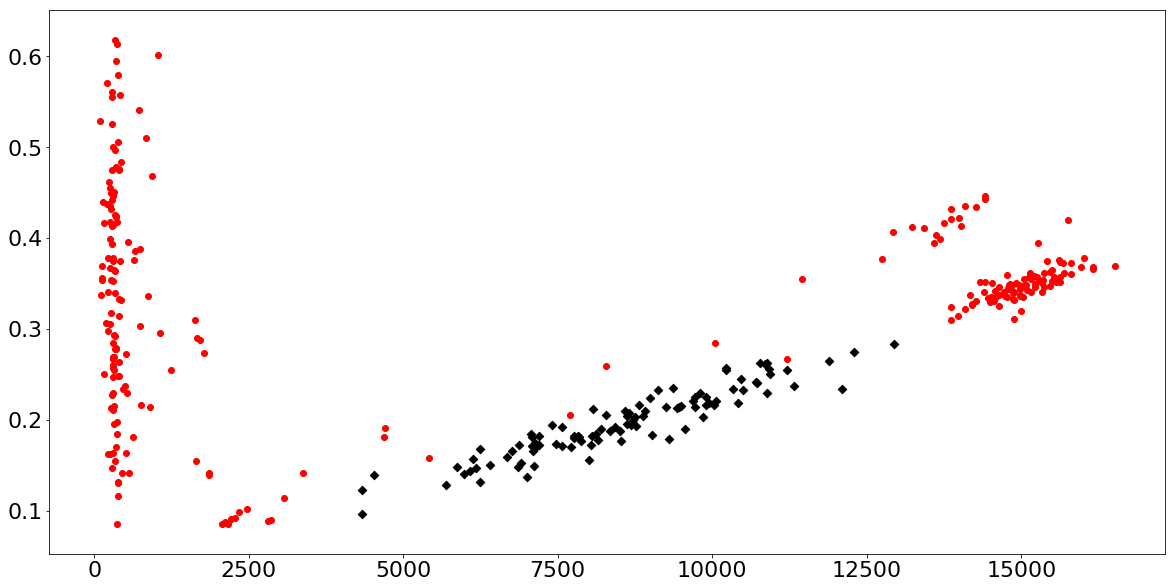

42421


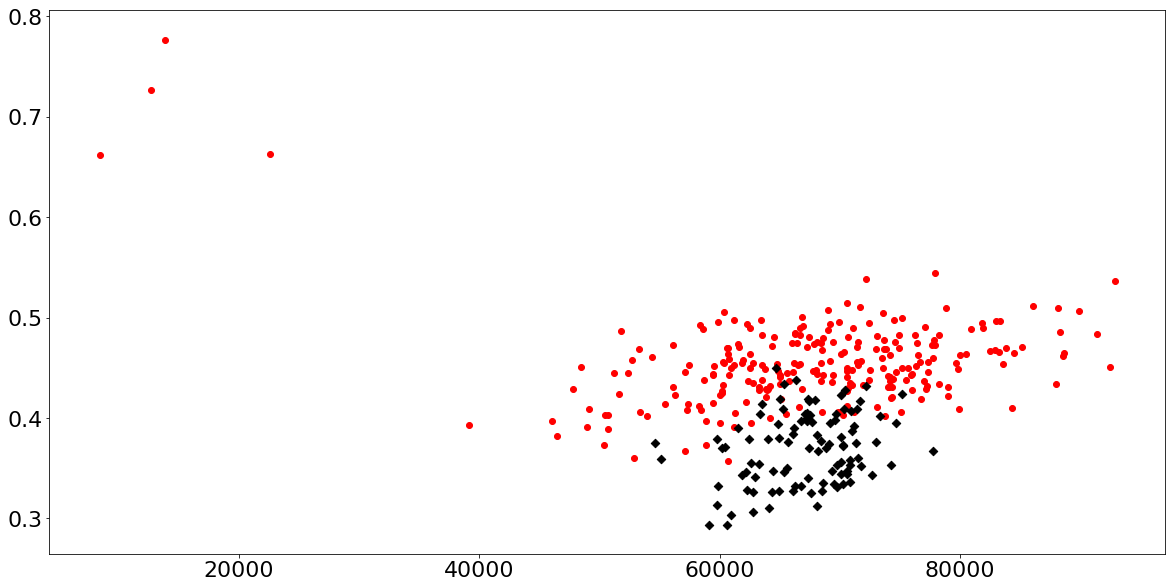

42423


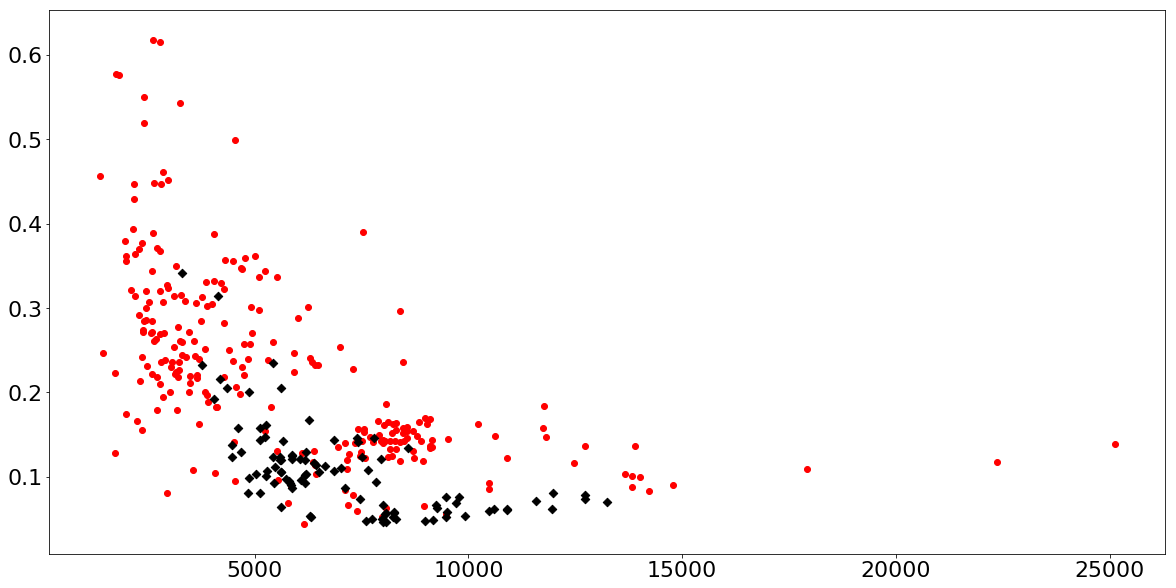

43958


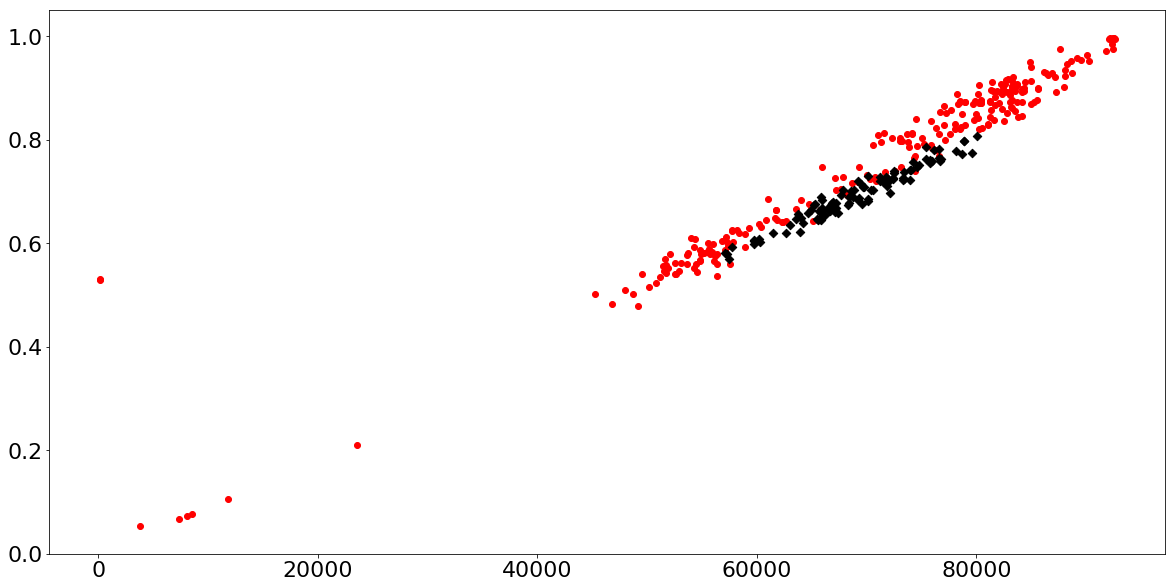

137110


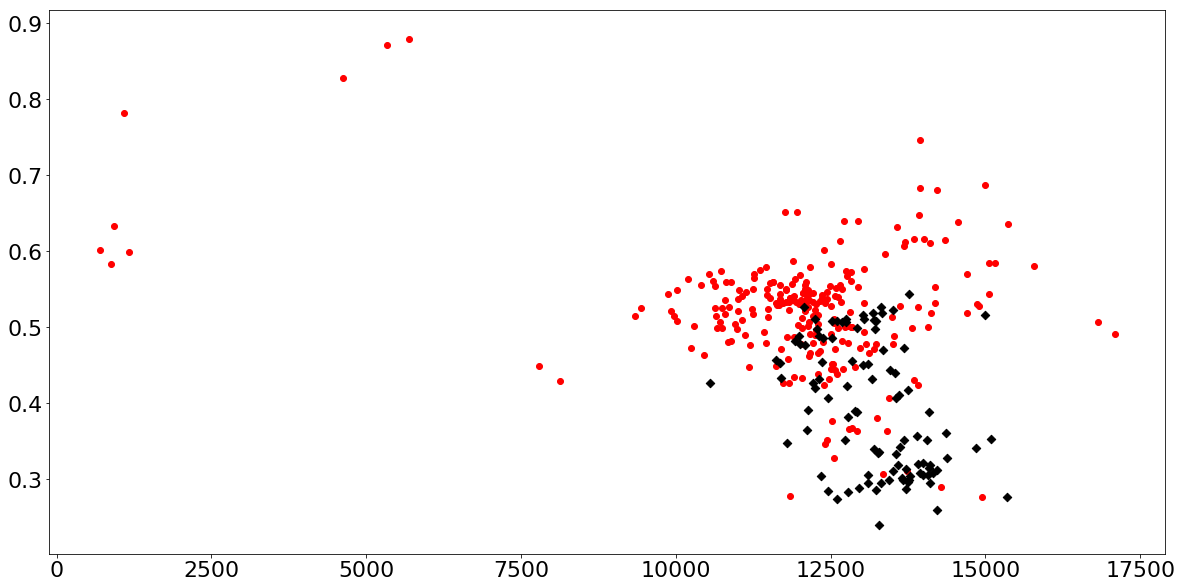

21655


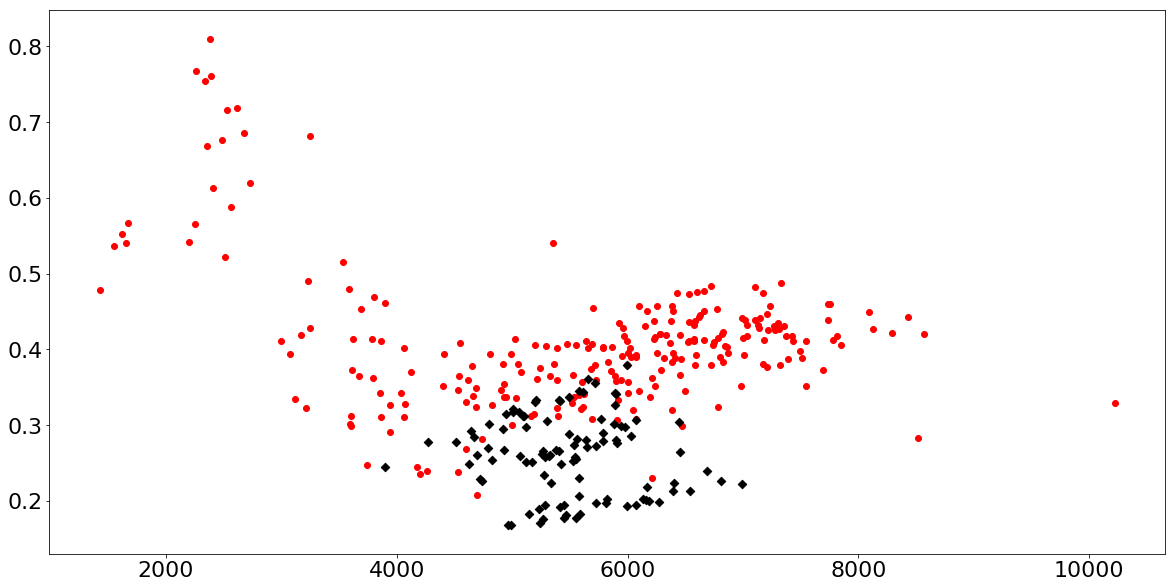

42431


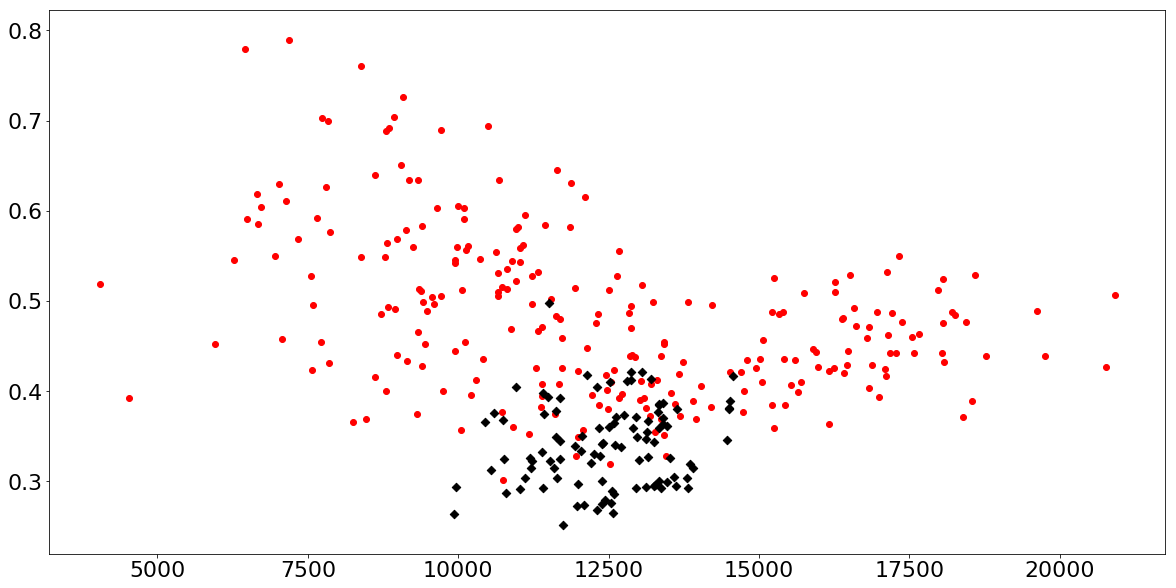

44834


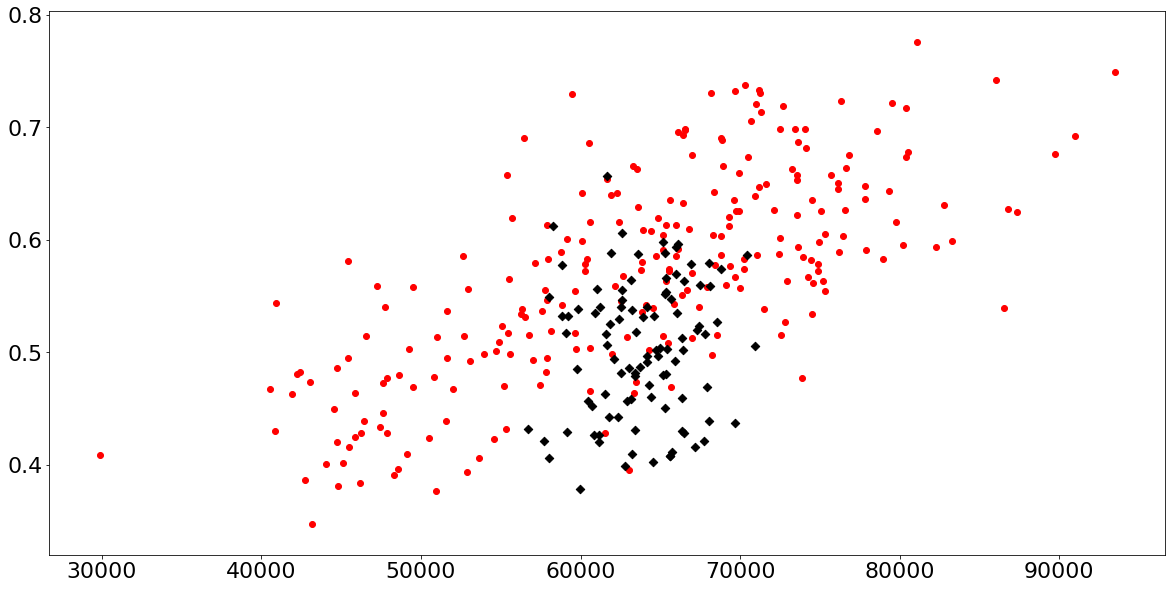

56452


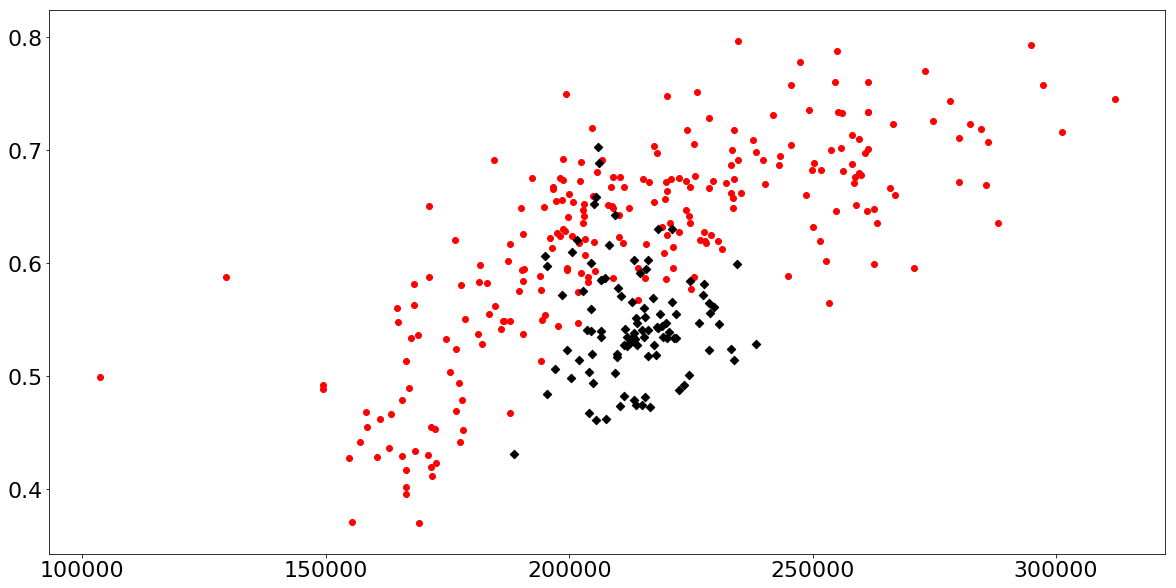

56457


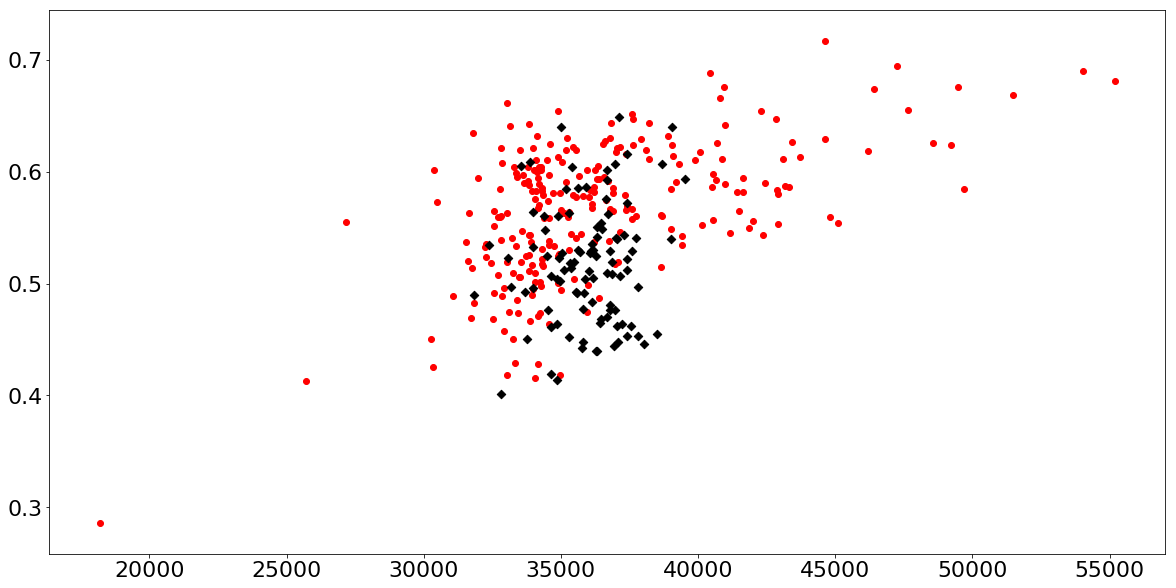

56458


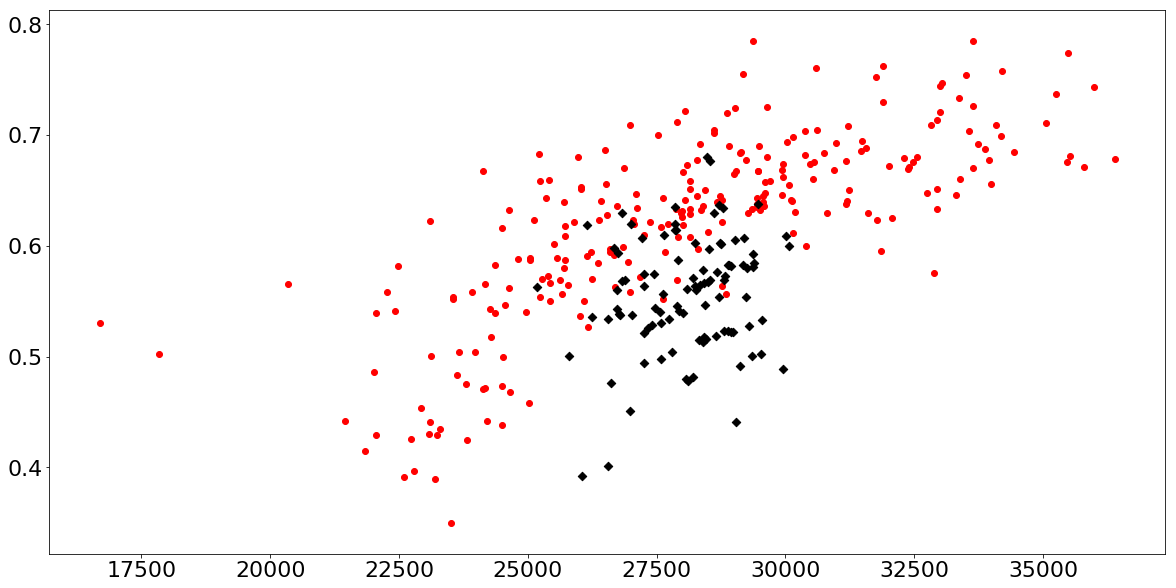

124642


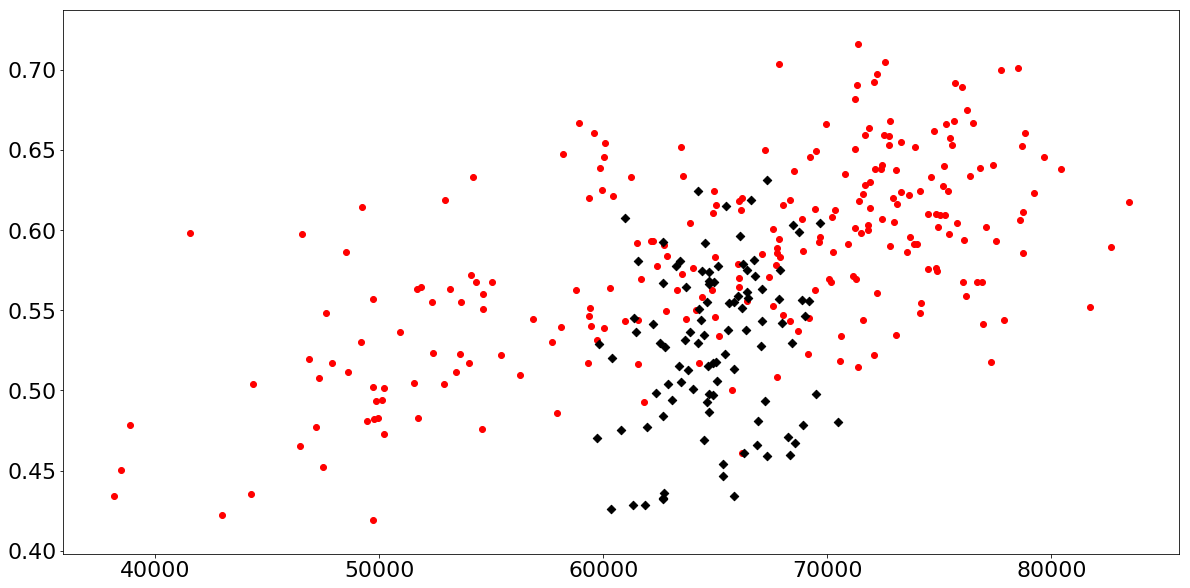

124647


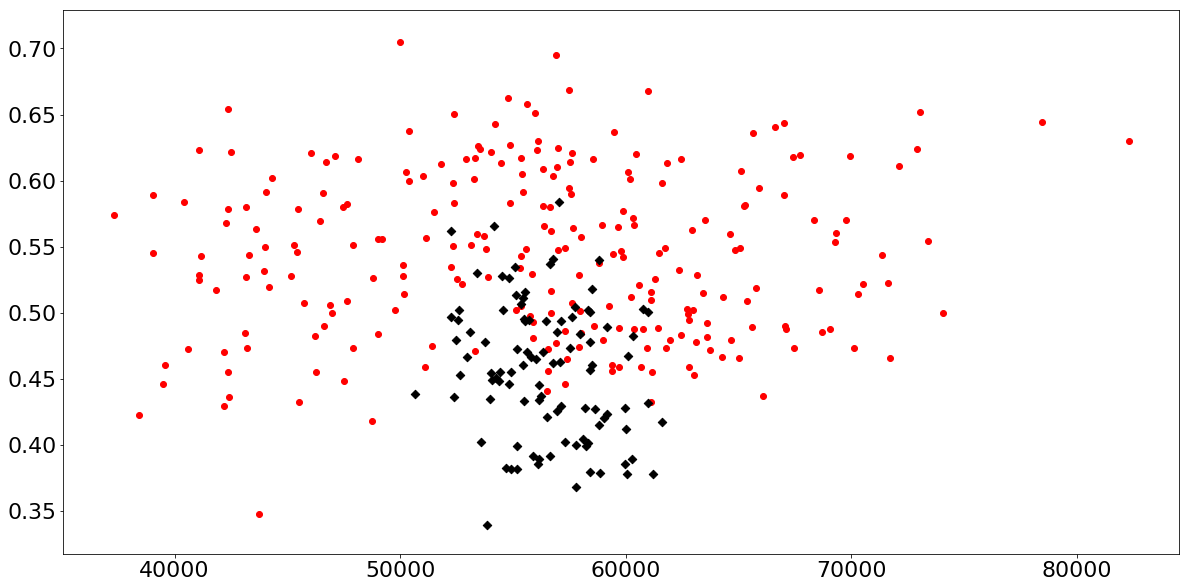

124649


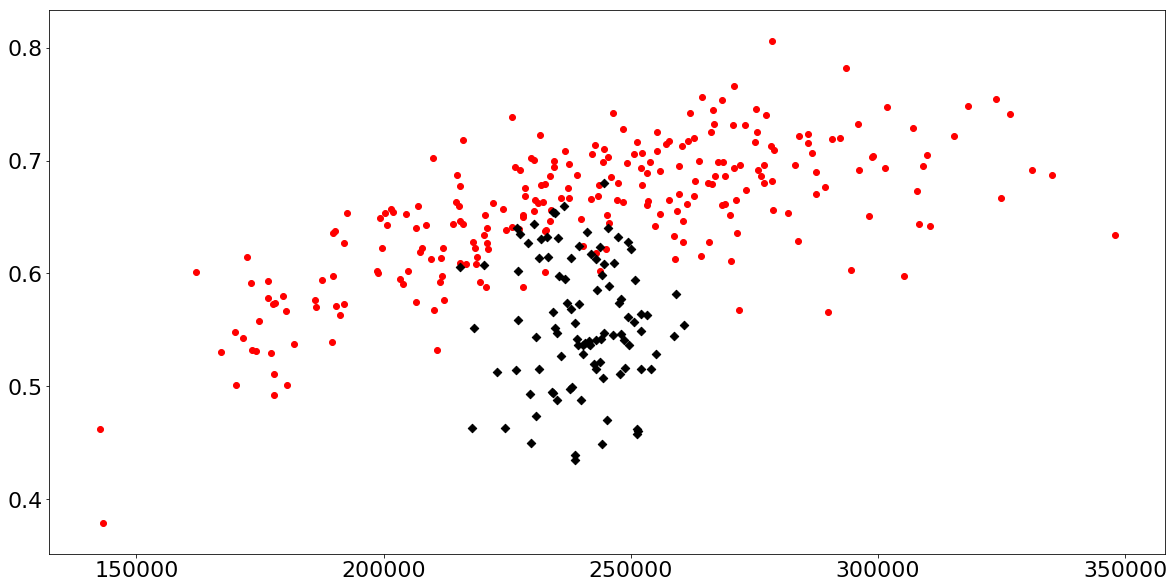

124656


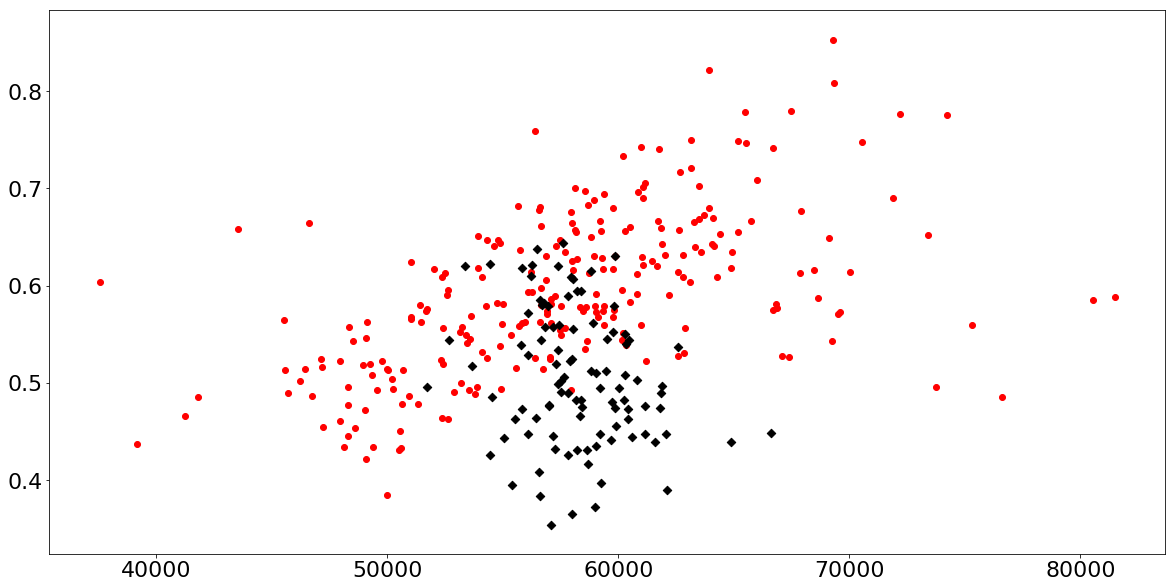

124683


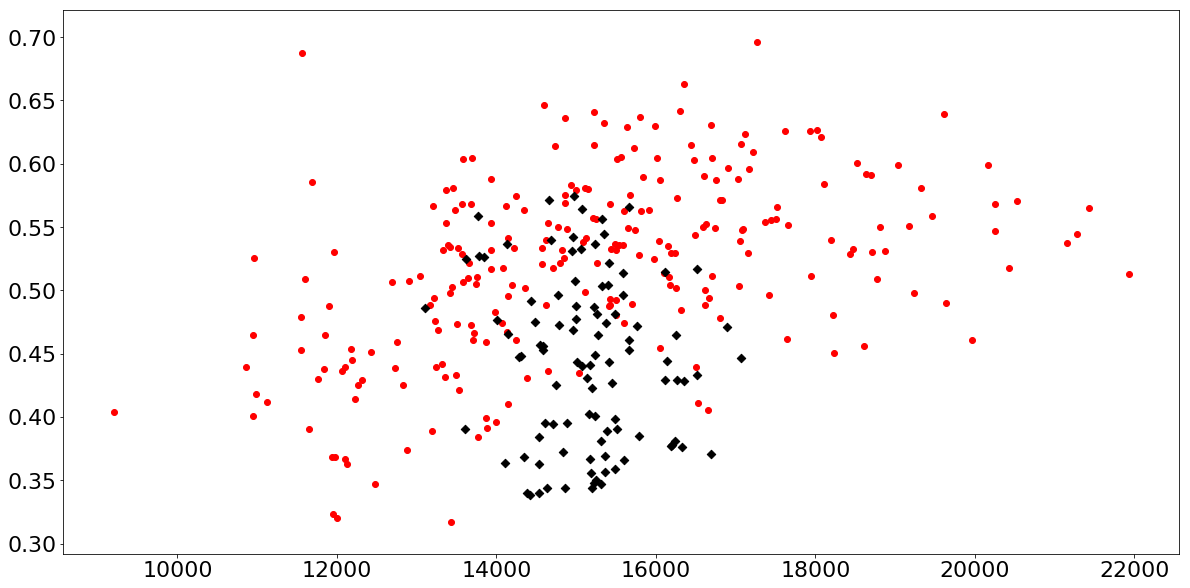

185767


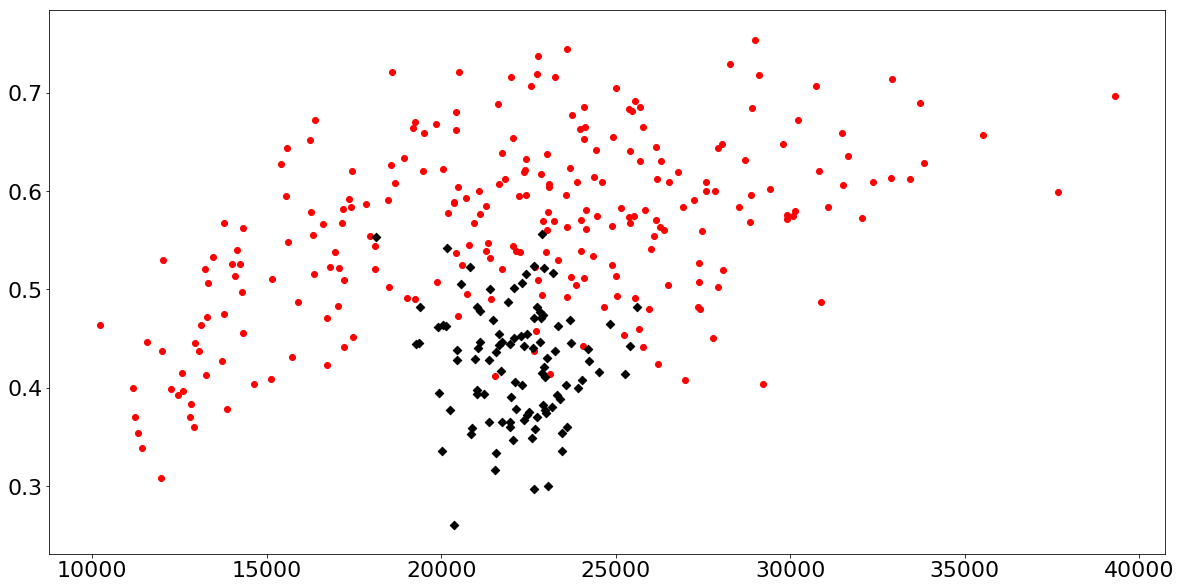

56448


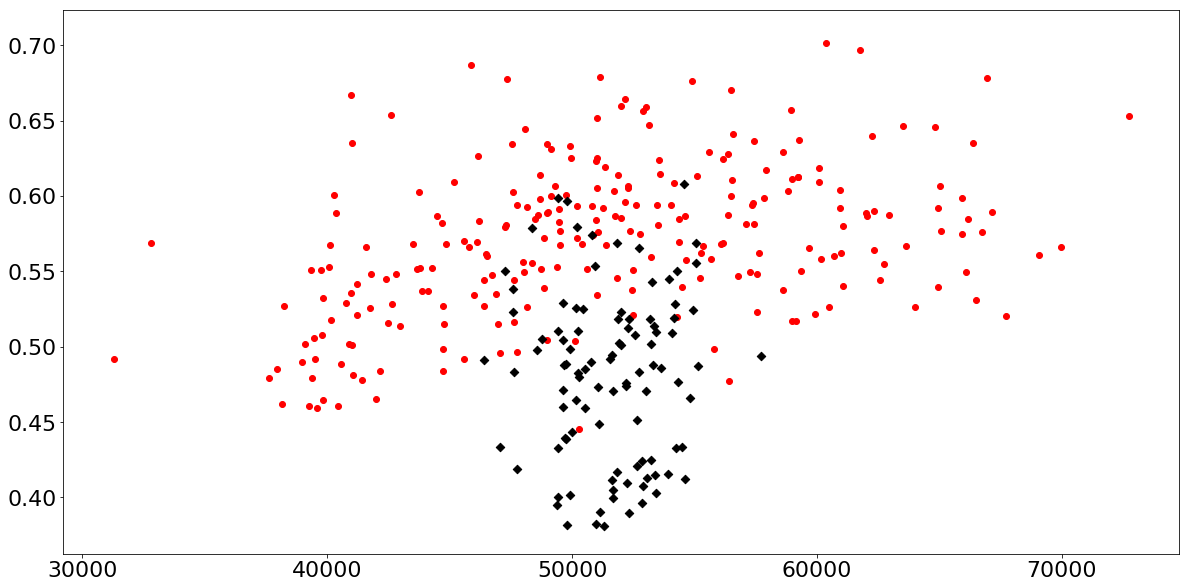

136900


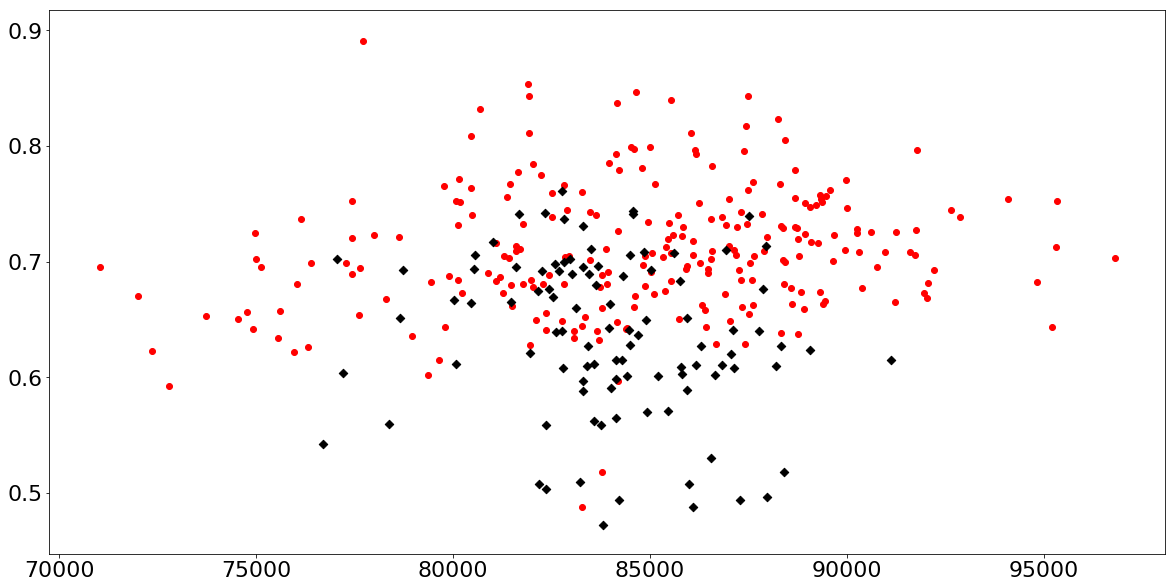

137094


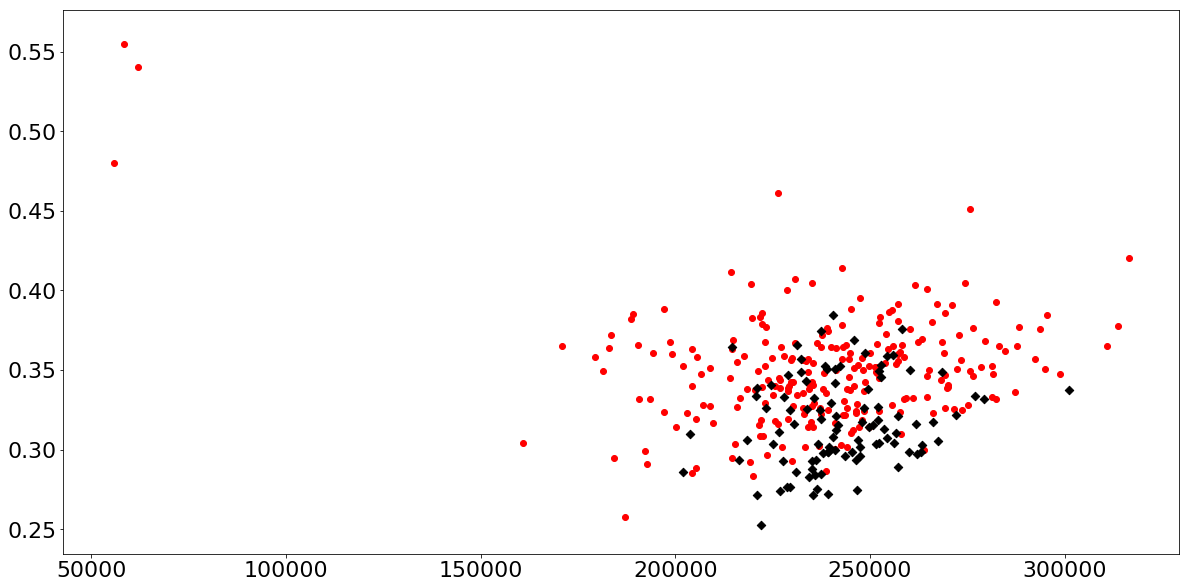

164978


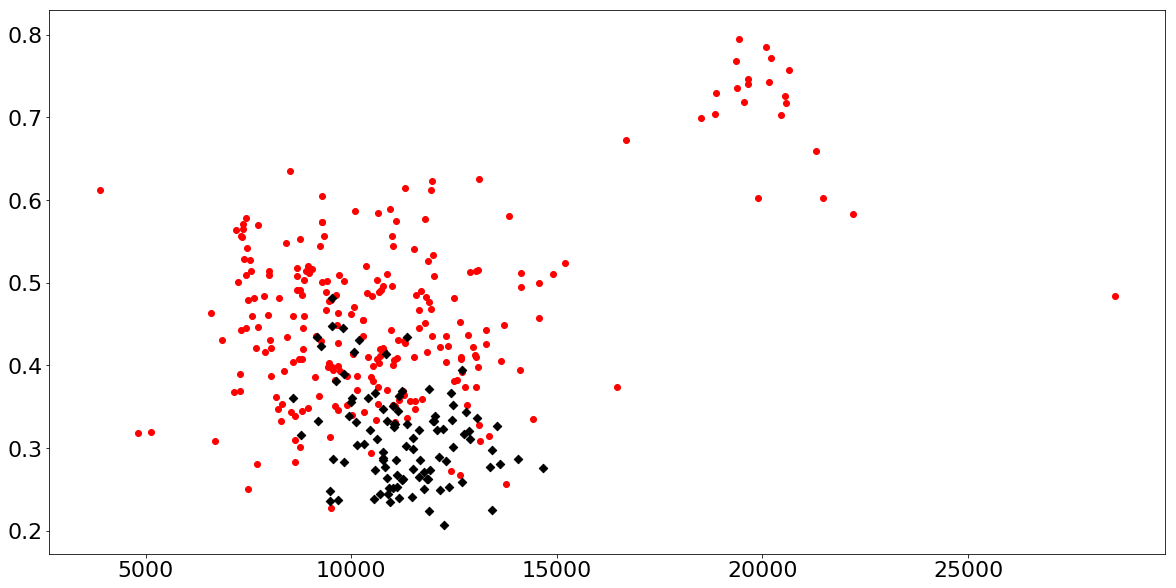

189318


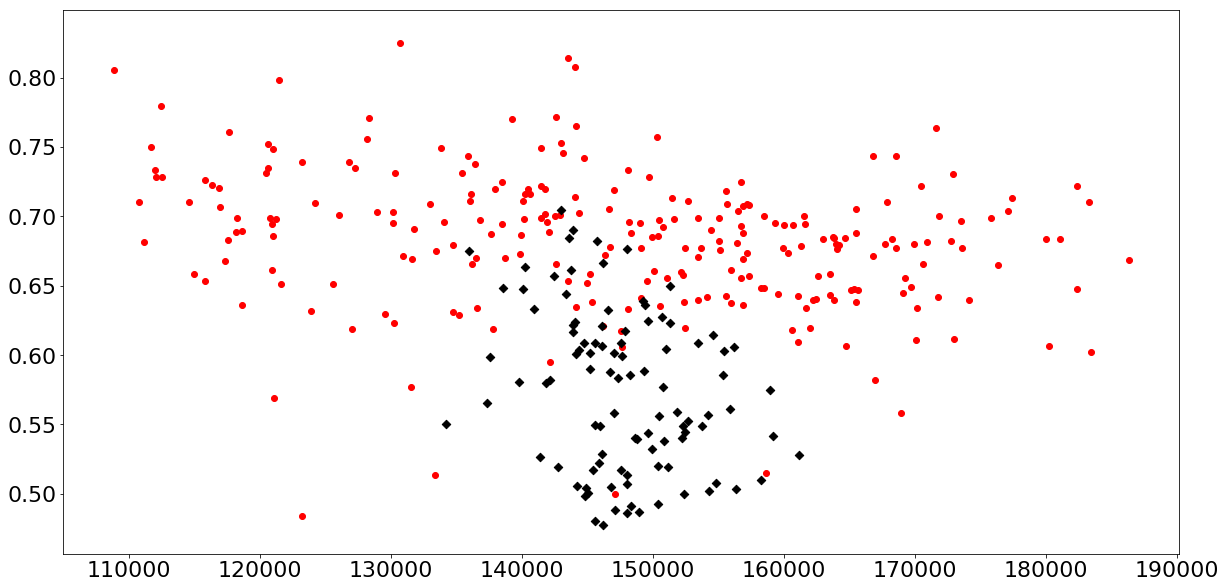

193781


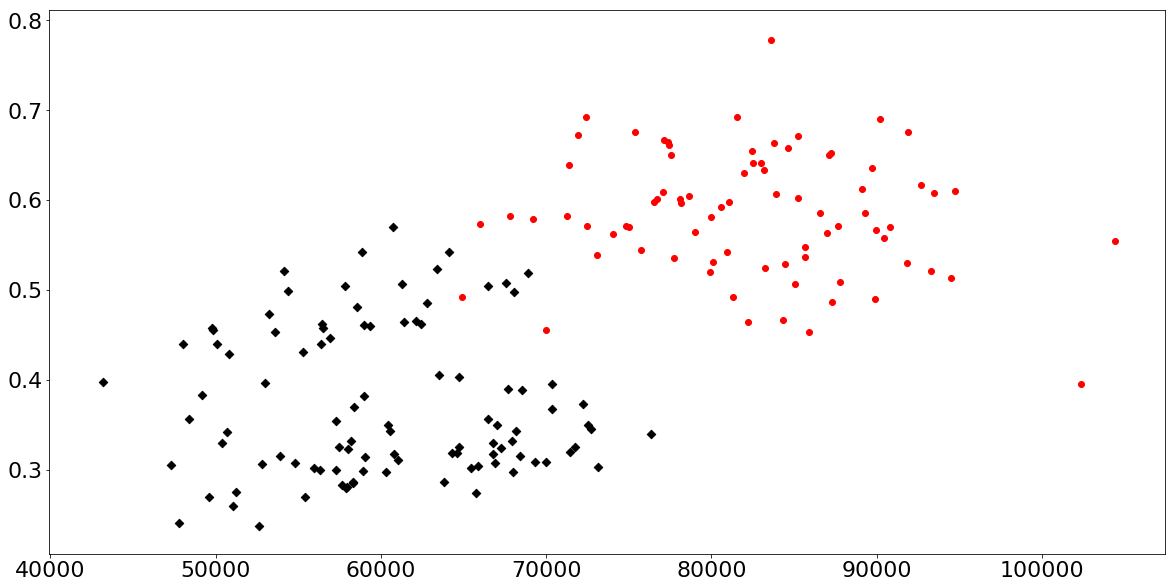

44318


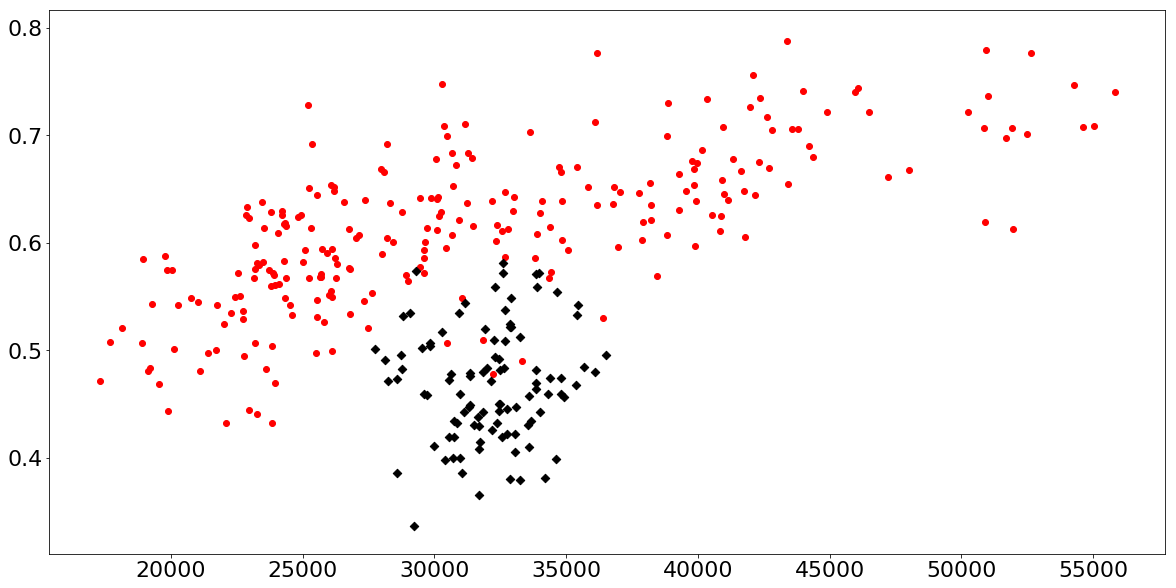

124687


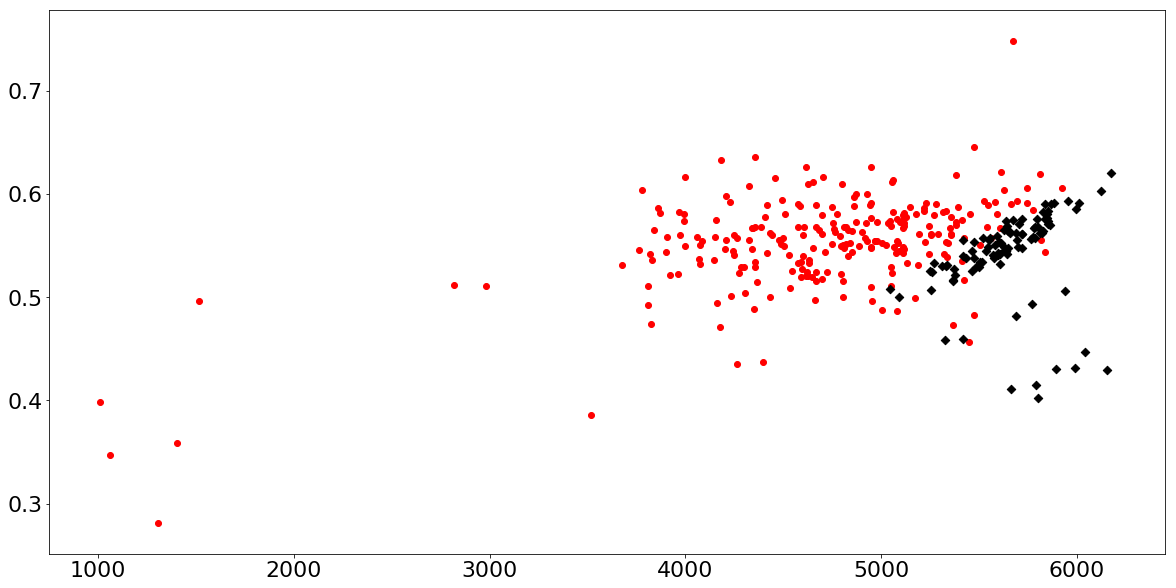

21689


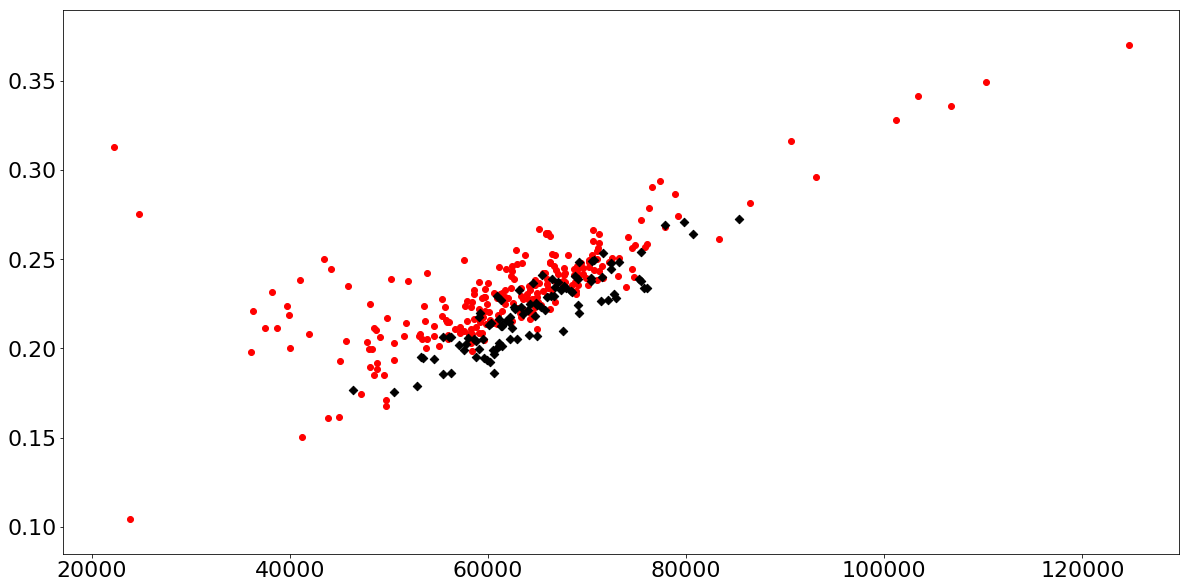

44831


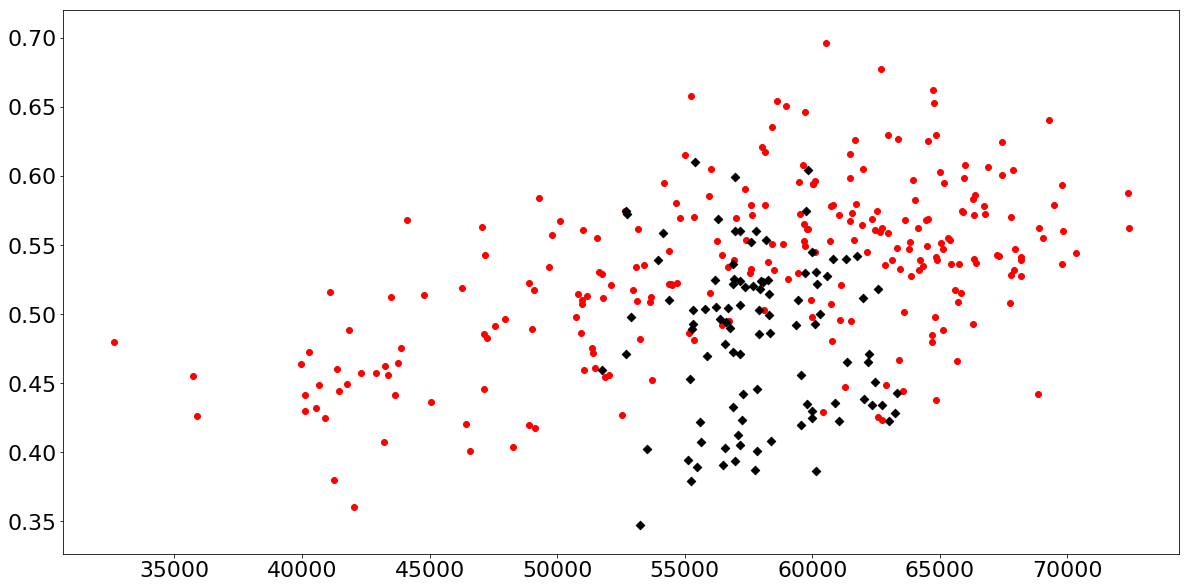

56459


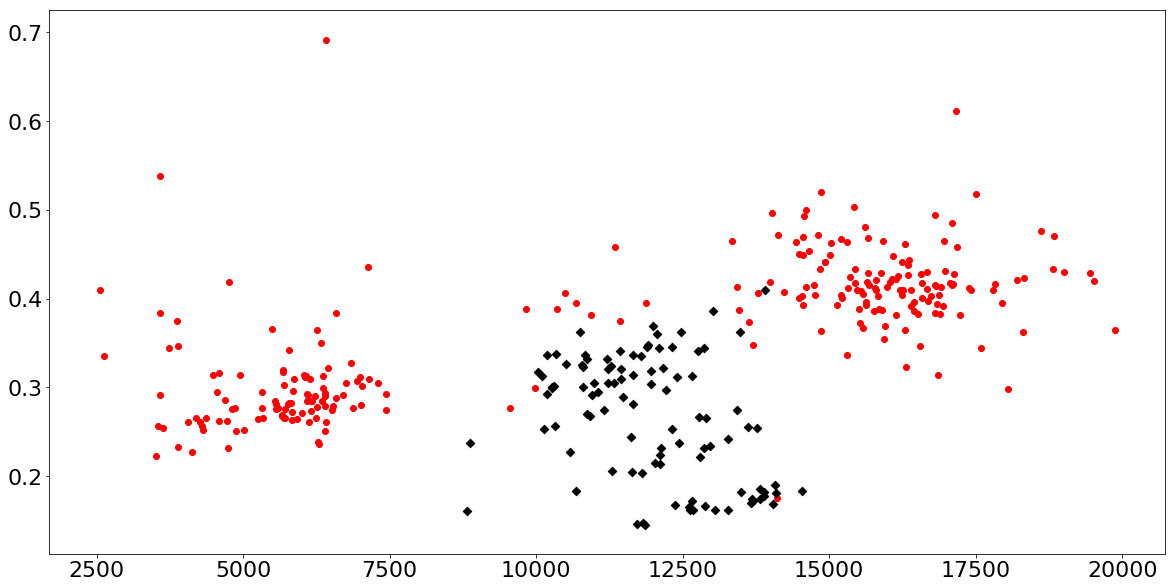

124678


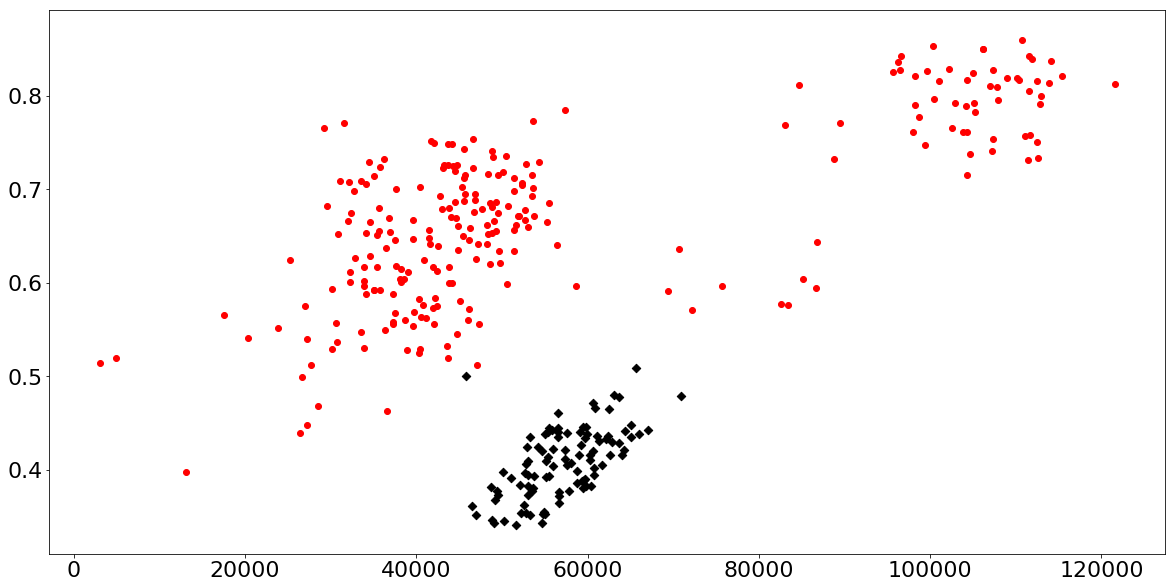

In [70]:
for AMR_id in list(dict_AMR_avg_cost_LF_working_day.keys()):
    print(AMR_id)
    fig, ax = plt.subplots()
    x=dict_AMR_raw[AMR_id]['working_day']['cost']
    # print(x)
    y=dict_AMR_raw[AMR_id]['working_day']['LF']
    # print(y)
    ax.scatter(x,y,color='r')
    x=dict_AMR_avg_cost_LF_working_day[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF_working_day[AMR_id]['LF']
    ax.scatter(x,y,color='k',marker="D")
    plt.show()



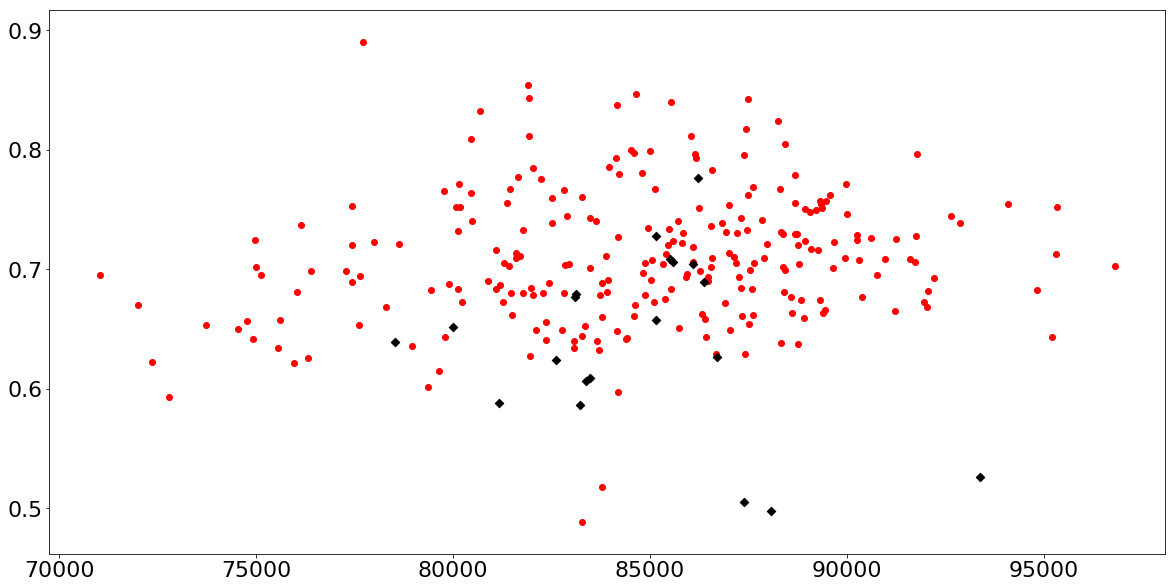

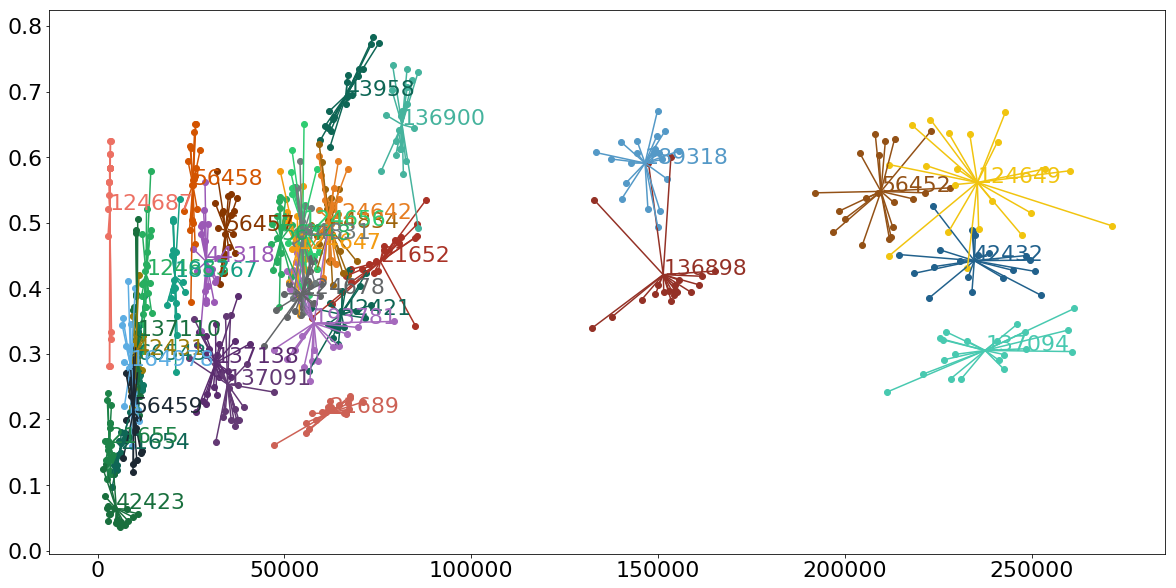

In [160]:
fig, ax = plt.subplots()
list_color=['#A93226', '#943126', '#633974', '#5B2C6F', '#21618C', '#117864', '#0E6655', 
           '#0E6655', '#196F3D', '#0E6655', '#196F3D', '#1D8348', '#9A7D0A', '#9C640C', 
           '#935116', '#873600', '#D35400', '#E67E22', '#F39C12', '#F1C40F', '#2ECC71', 
           '#27AE60', '#16A085', '#27AE60', '#45B39D', '#48C9B0', '#5DADE2', '#5499C7', 
           '#A569BD', '#9B59B6', '#EC7063', '#CD6155', '#707B7C', '#1C2833', '#626567']
# print(len(dict_AMR_avg_cost_LF))
for AMR_id, color in zip(list(dict_AMR_avg_cost_LF.keys()),list_color):
#     print(AMR_id)
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y,color=color)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean,color)
    
x=[ dict_AMR_avg_cost_LF[x]['avg_cost'] for x in dict_AMR_avg_cost_LF]
y=[ dict_AMR_avg_cost_LF[y]['avg_LF'] for y in dict_AMR_avg_cost_LF]
name=[x for x in dict_AMR_avg_cost_LF]
# print(len(name))
for i, txt in enumerate(name):
    ax.annotate(txt, (x[i], y[i]),color=list_color[i])
plt.show()


In [154]:
list_AMR_id=list(dict_AMR_avg_cost_LF.keys())
list_AMR_id_1=list_AMR_id.copy()
list_AMR_id_1.remove(189318)
list_AMR_id_1.remove(136898)
list_AMR_id_1.remove(56452)
list_AMR_id_1.remove(124649)
list_AMR_id_1.remove(42432)
list_AMR_id_1.remove(137094)

list_AMR_id_2=[]
list_AMR_id_2.append(189318)
list_AMR_id_2.append(136898)
list_AMR_id_2.append(56452)
list_AMR_id_2.append(124649)
list_AMR_id_2.append(42432)
list_AMR_id_2.append(137094)


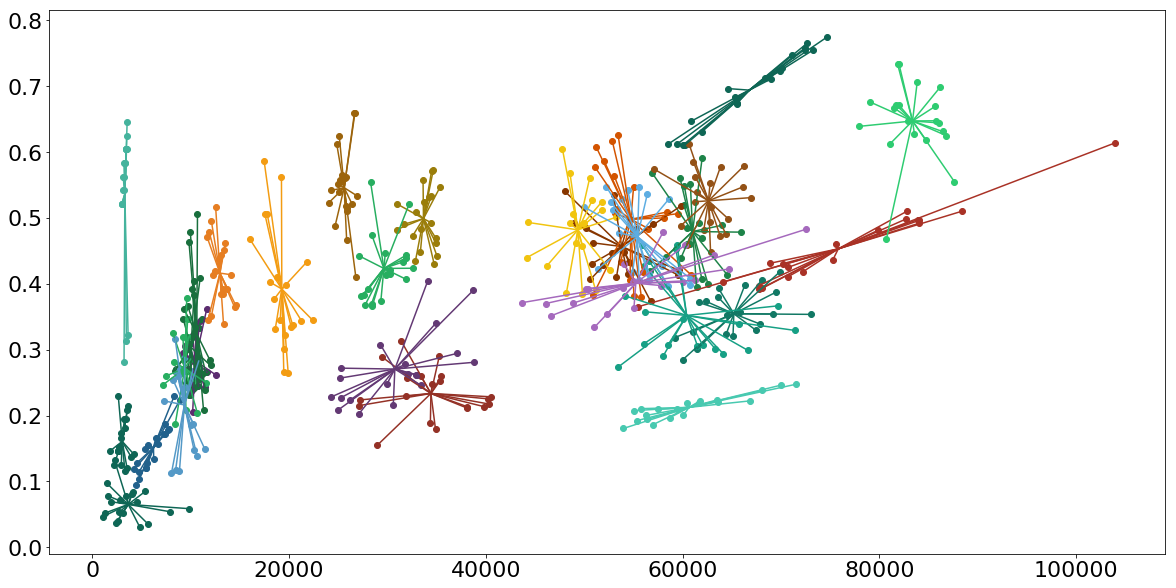

In [155]:
fig, ax = plt.subplots()
list_color=['#A93226', '#943126', '#633974', '#5B2C6F', '#21618C', '#117864', '#0E6655', 
           '#0E6655', '#196F3D', '#0E6655', '#196F3D', '#1D8348', '#9A7D0A', '#9C640C', 
           '#935116', '#873600', '#D35400', '#E67E22', '#F39C12', '#F1C40F', '#2ECC71', 
           '#27AE60', '#16A085', '#27AE60', '#45B39D', '#48C9B0', '#5DADE2', '#5499C7', 
           '#A569BD', '#9B59B6', '#EC7063', '#CD6155', '#707B7C', '#1C2833', '#626567']
# print(len(dict_AMR_avg_cost_LF))
for AMR_id, color in zip(list_AMR_id_1,list_color):
#     print(AMR_id)
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y,color=color)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean,color)
    


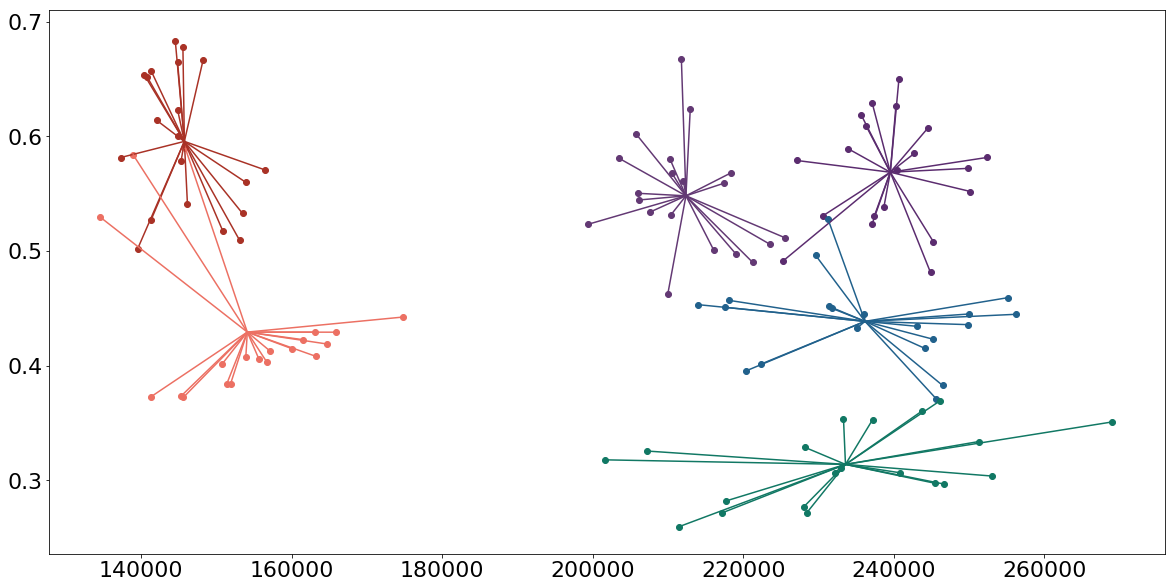

In [157]:
fig, ax = plt.subplots()
list_color=['#A93226', '#EC7063', '#633974', '#5B2C6F', '#21618C', '#117864', '#0E6655', 
           '#0E6655', '#196F3D', '#0E6655', '#196F3D', '#1D8348', '#9A7D0A', '#9C640C', 
           '#935116', '#873600', '#D35400', '#E67E22', '#F39C12', '#F1C40F', '#2ECC71', 
           '#27AE60', '#16A085', '#27AE60', '#45B39D', '#48C9B0', '#5DADE2', '#5499C7', 
           '#A569BD', '#9B59B6', '#EC7063', '#CD6155', '#707B7C', '#1C2833', '#626567']
# print(len(dict_AMR_avg_cost_LF))
for AMR_id, color in zip(list_AMR_id_2,list_color):
#     print(AMR_id)
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y,color=color)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean,color)
    


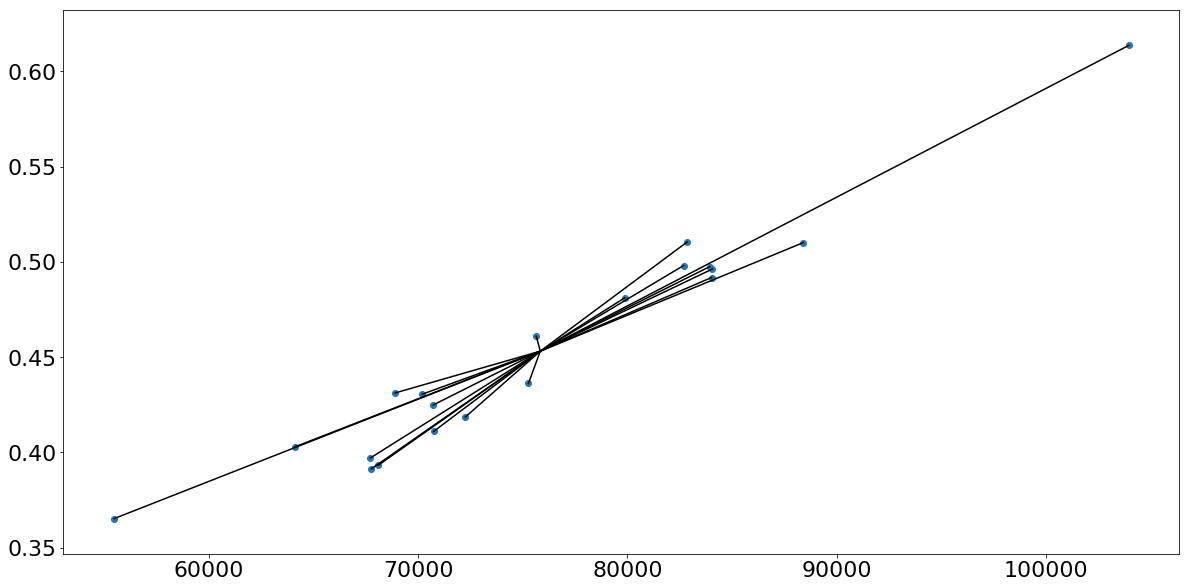

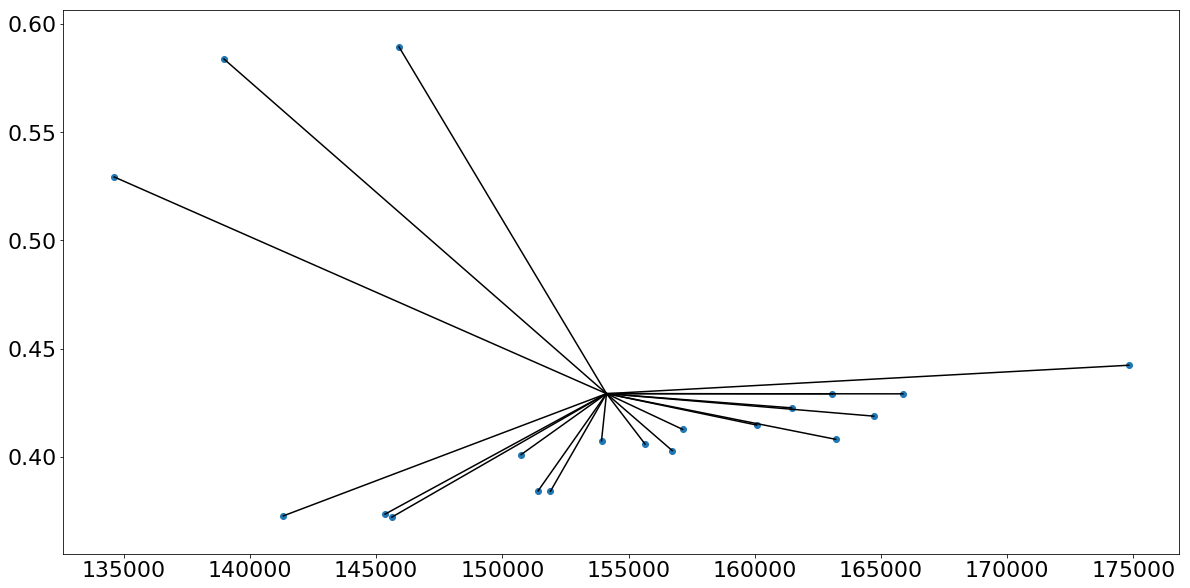

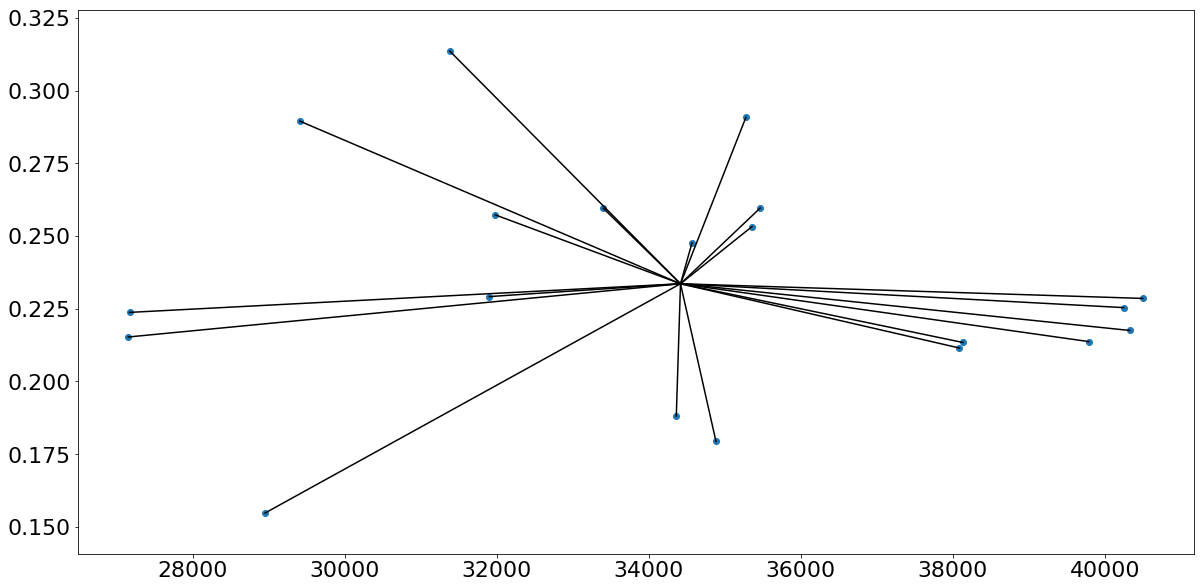

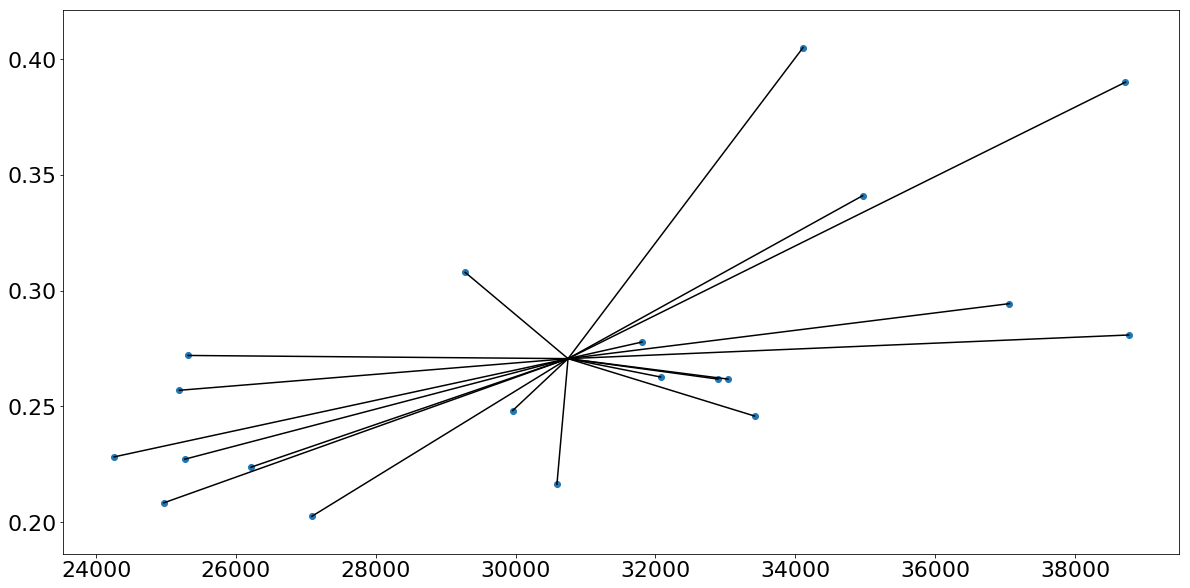

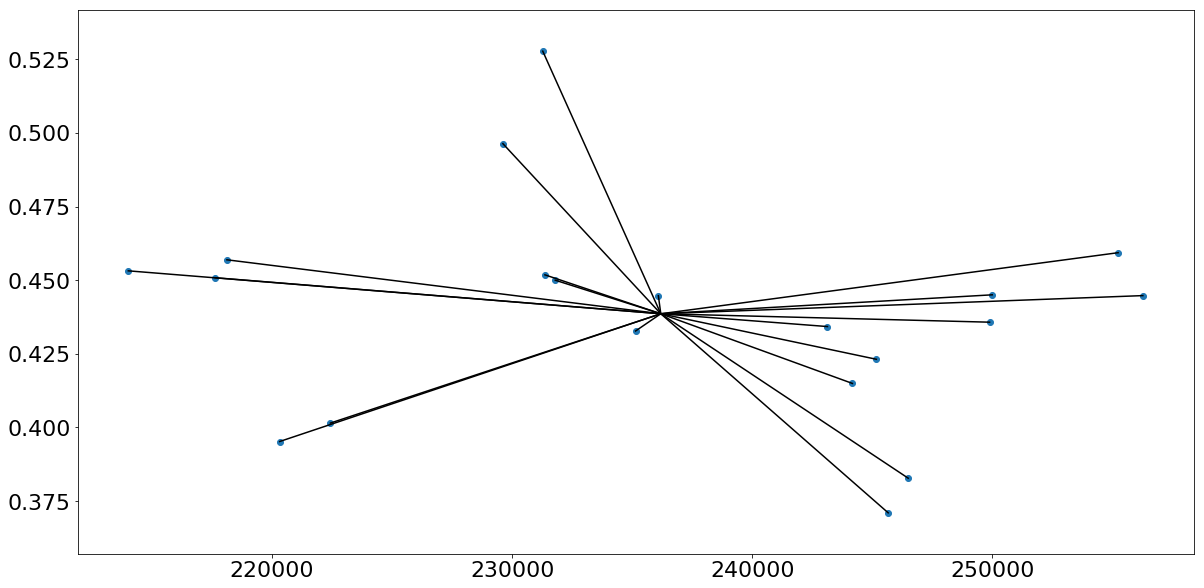

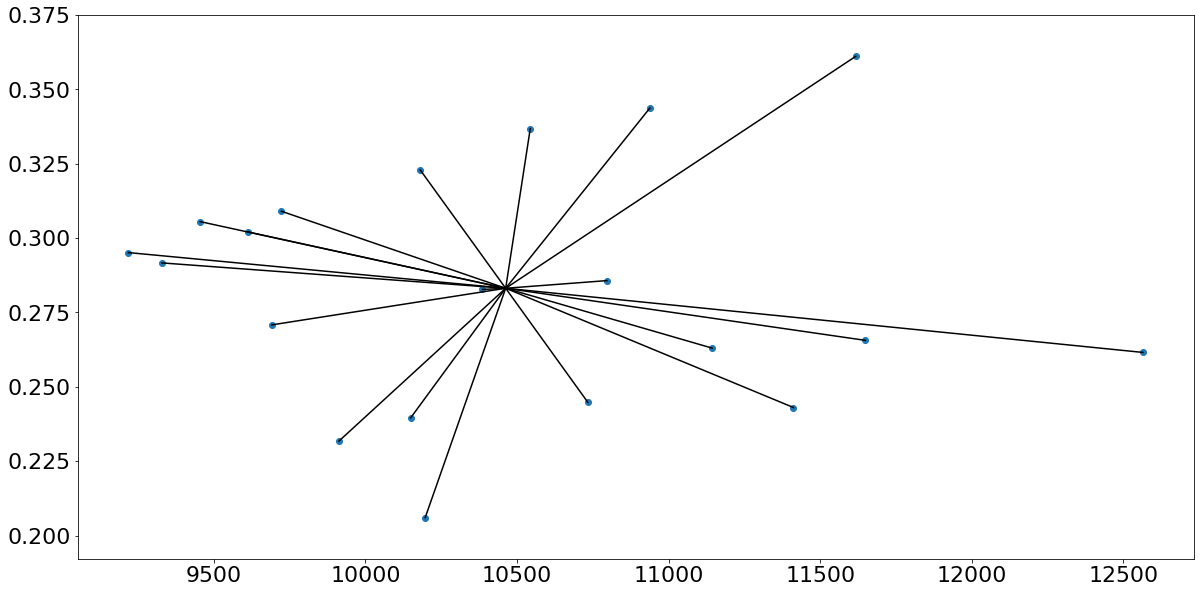

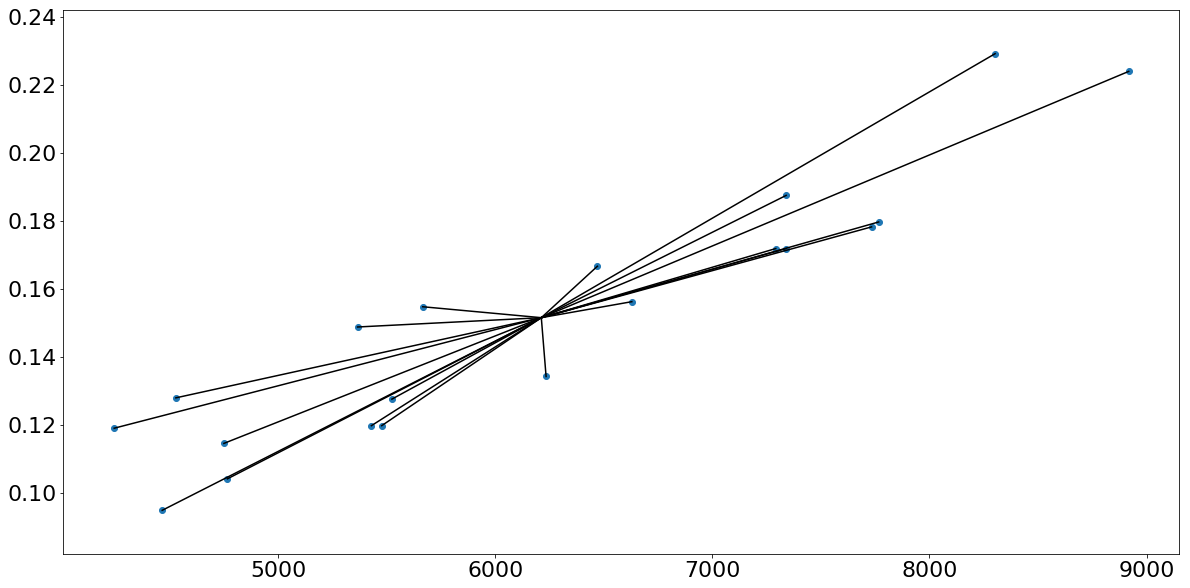

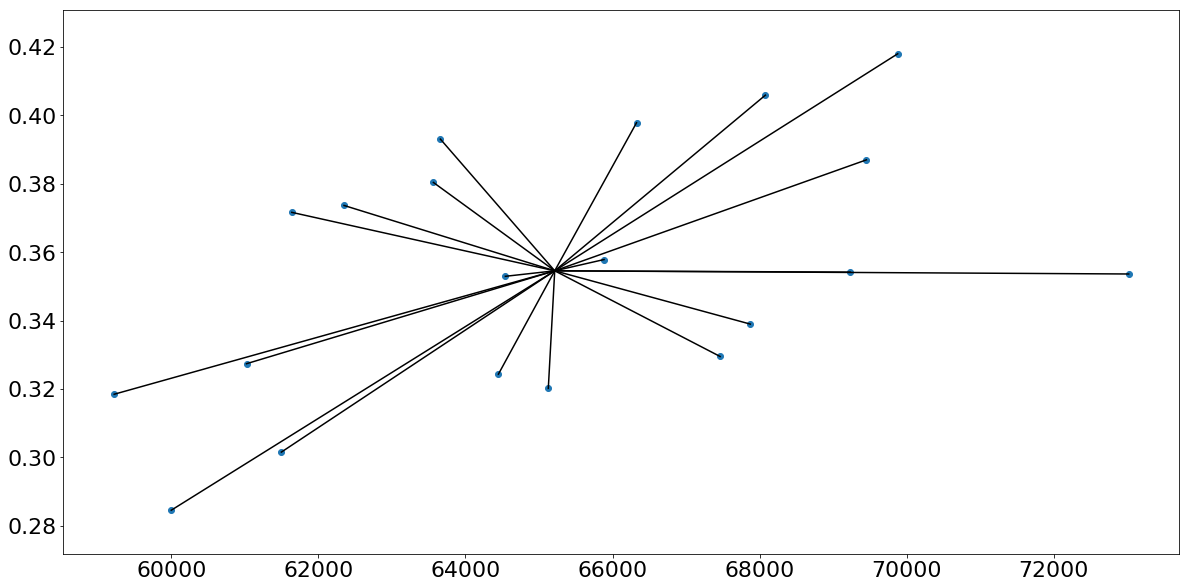

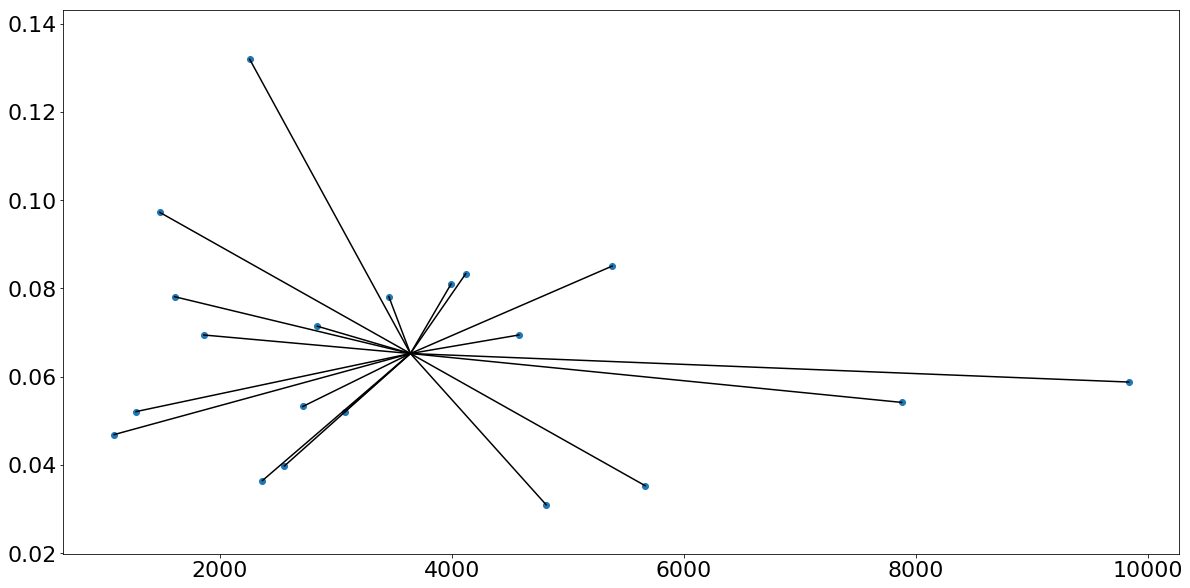

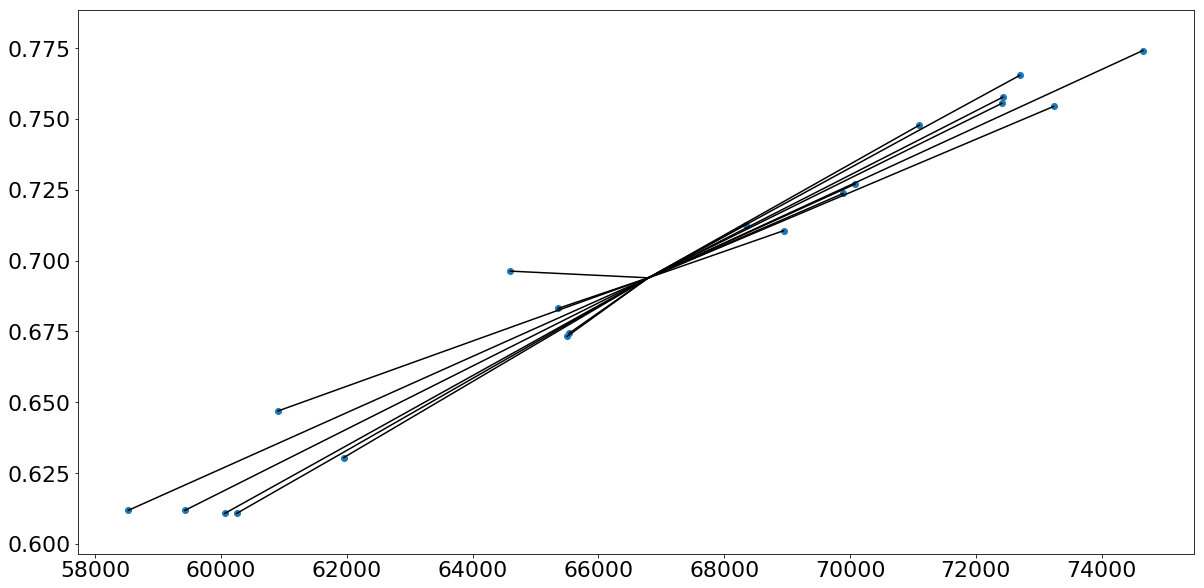

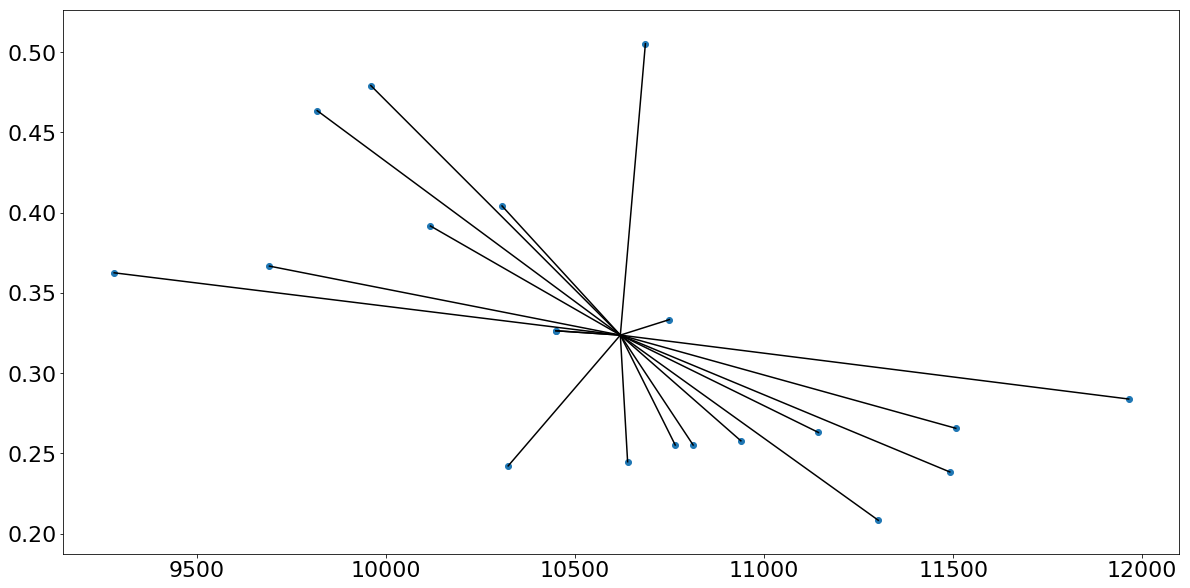

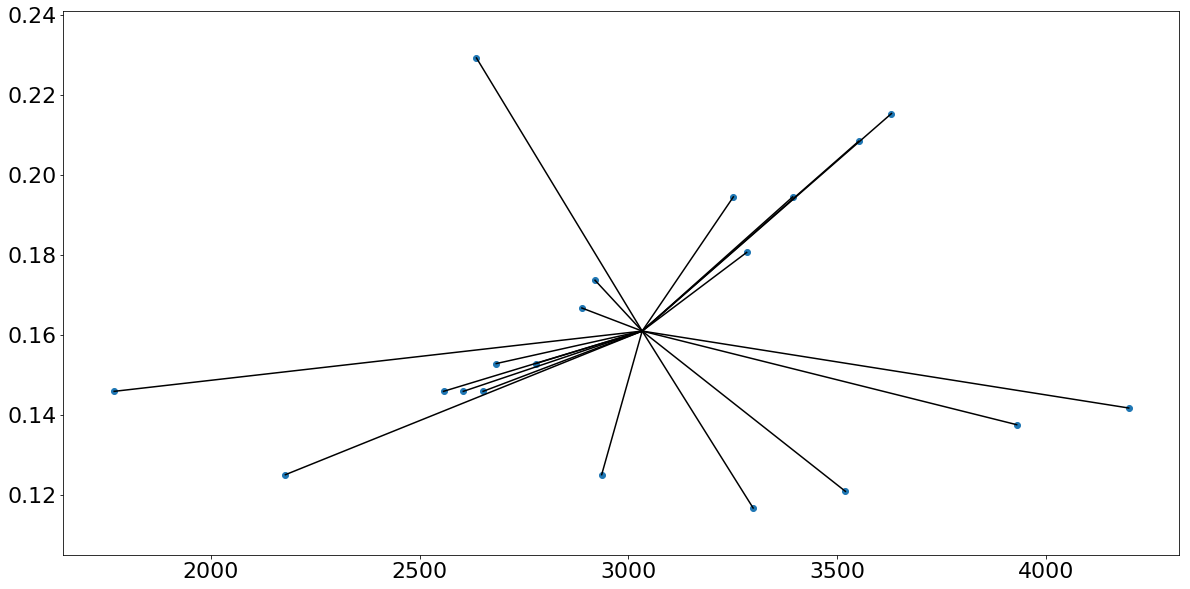

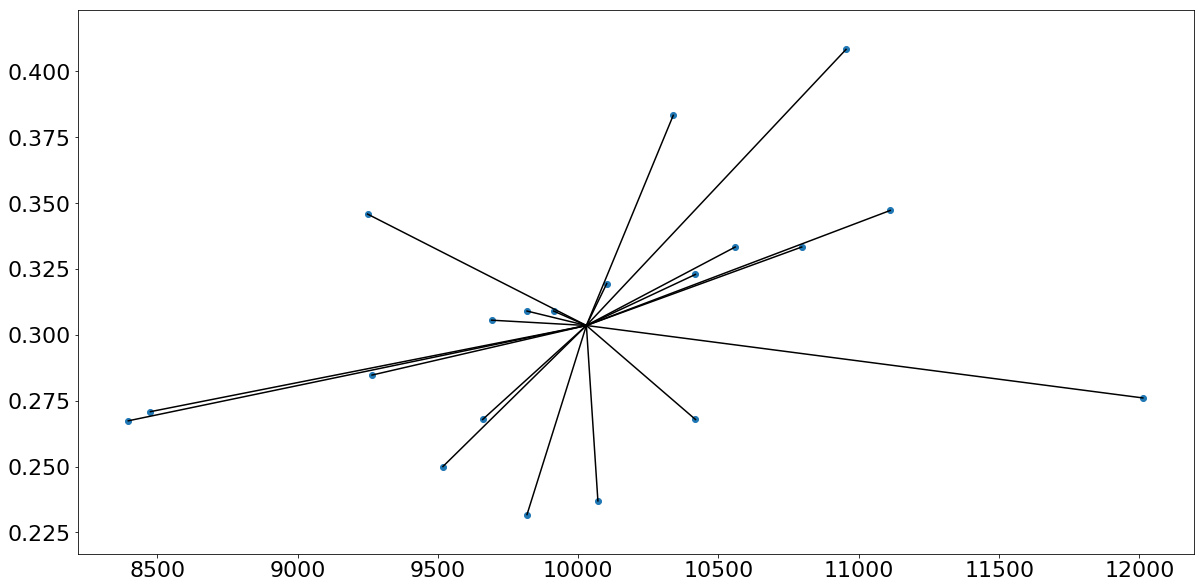

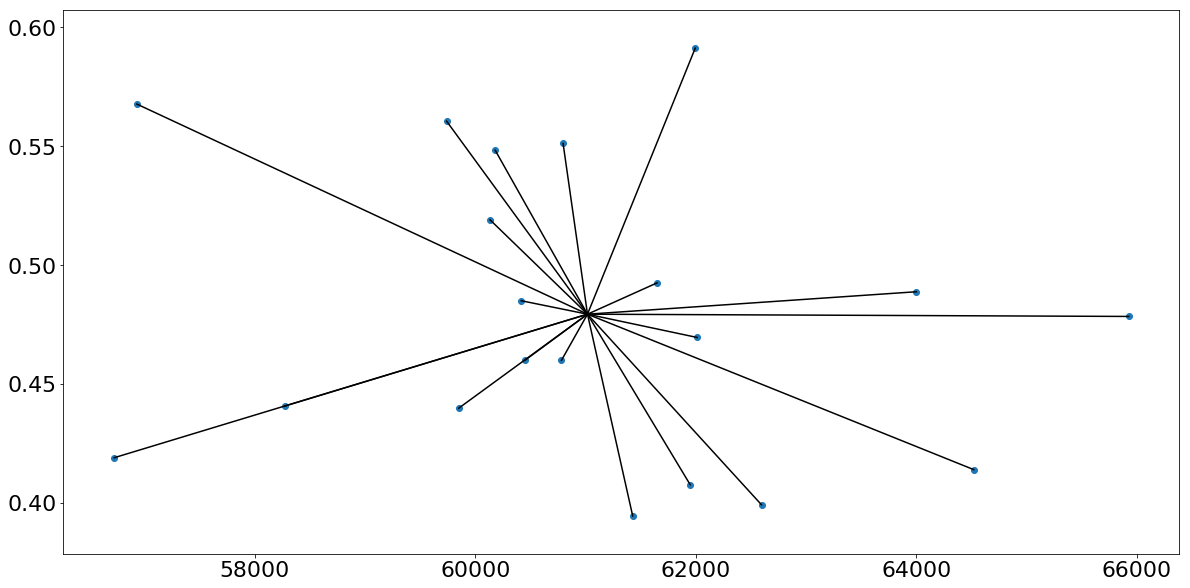

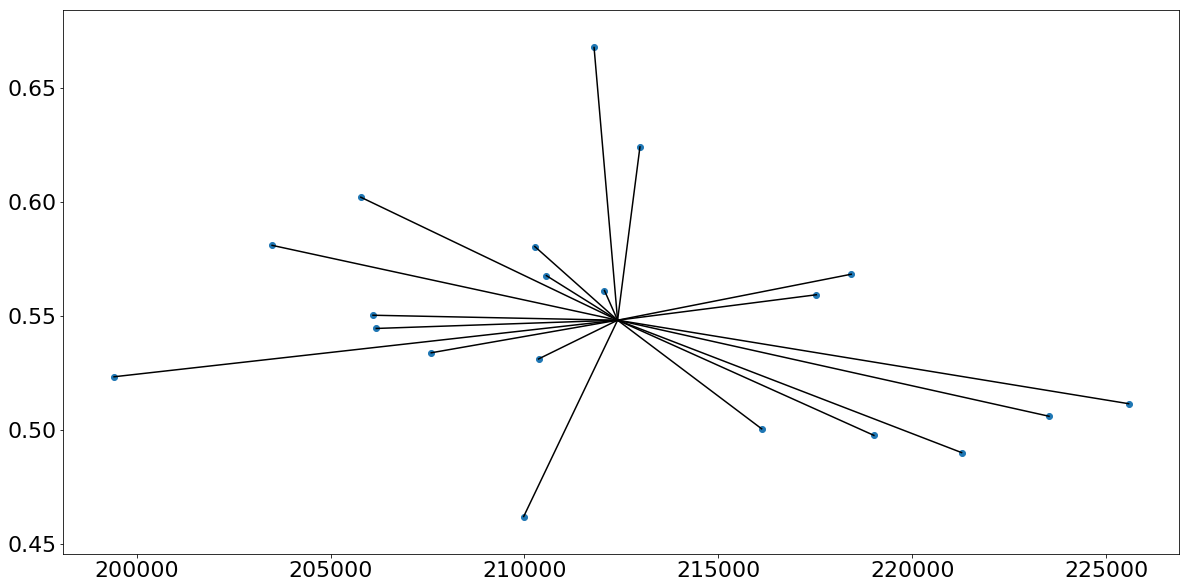

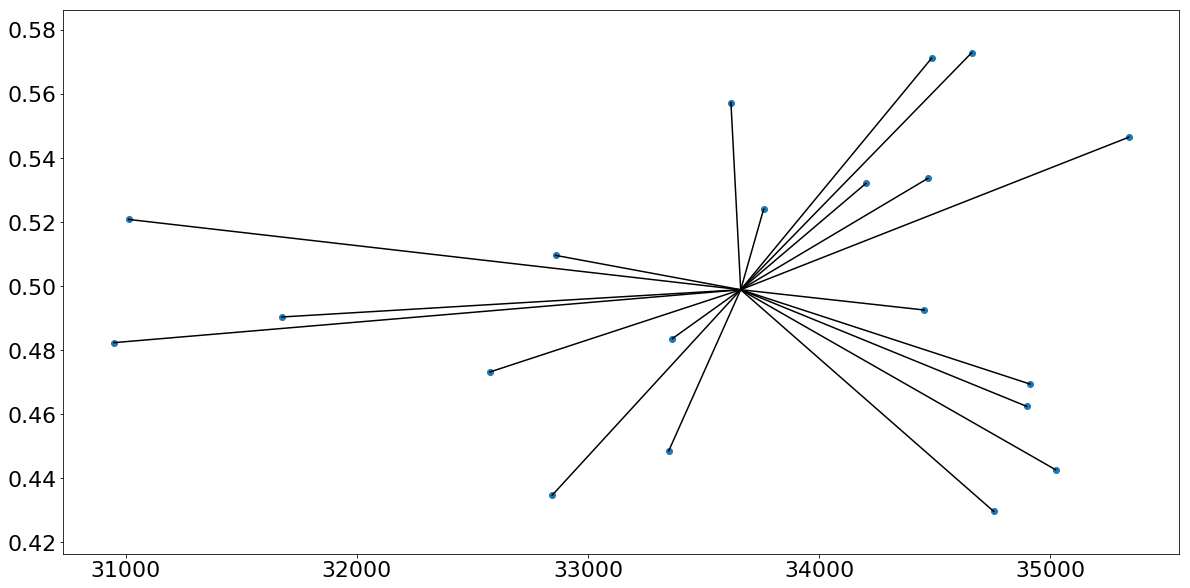

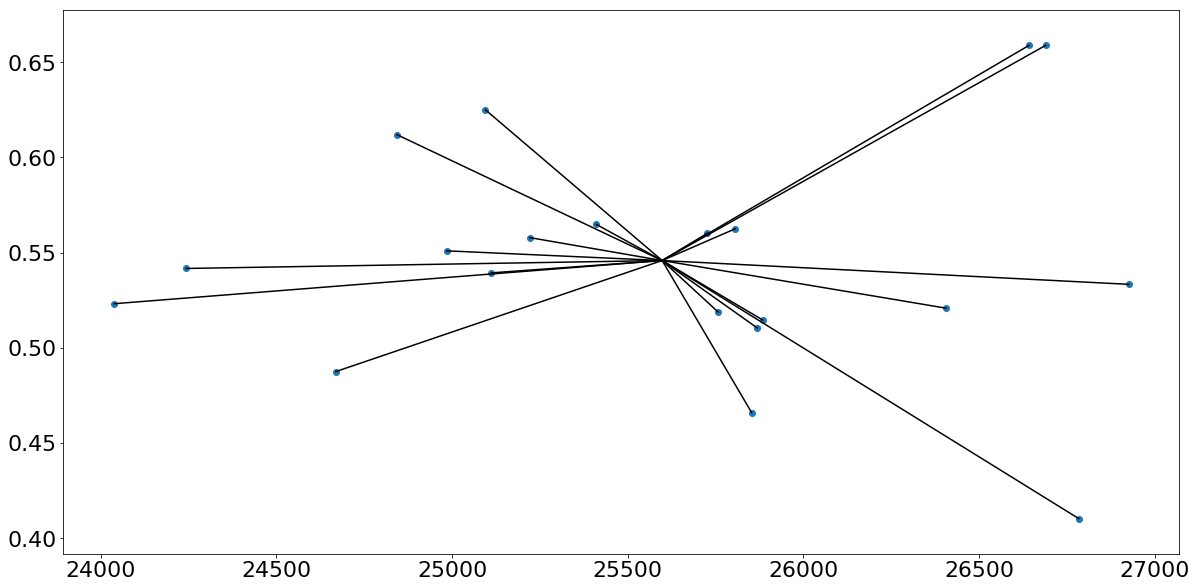

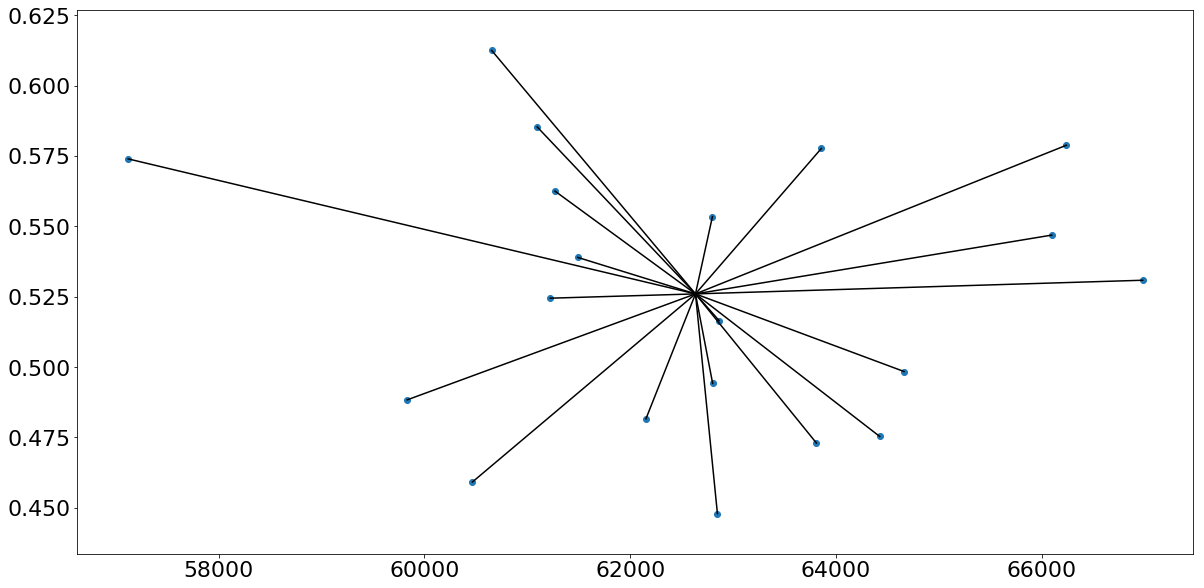

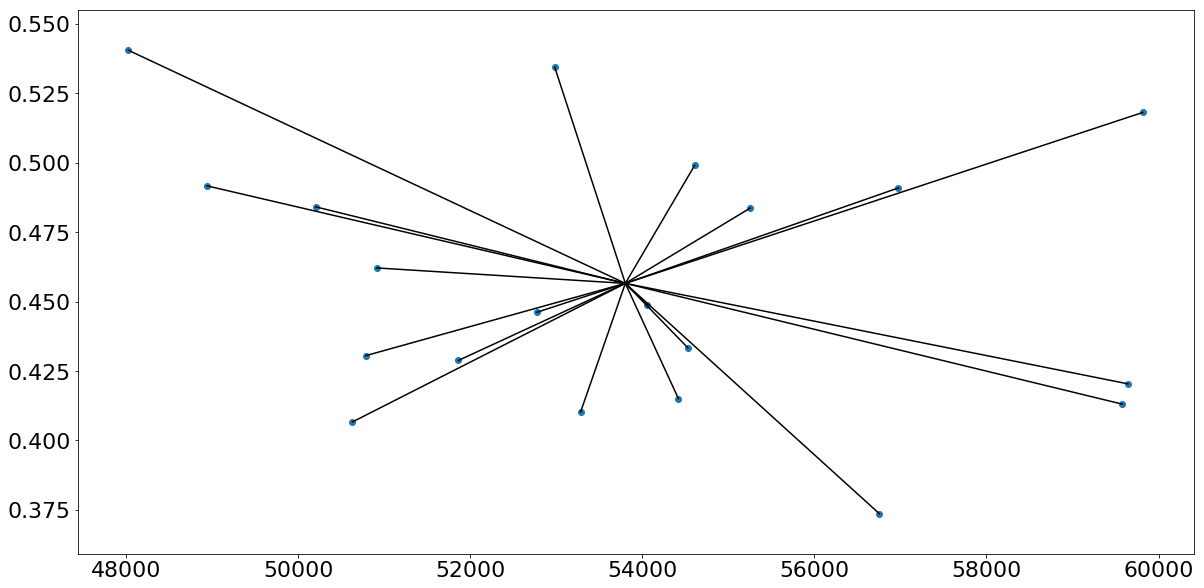

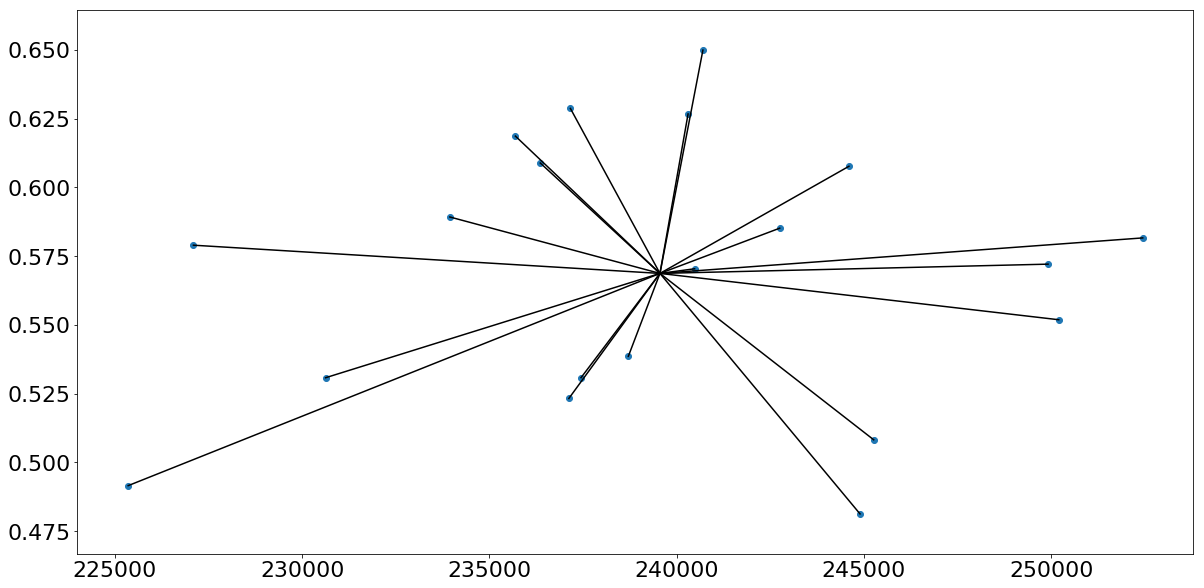

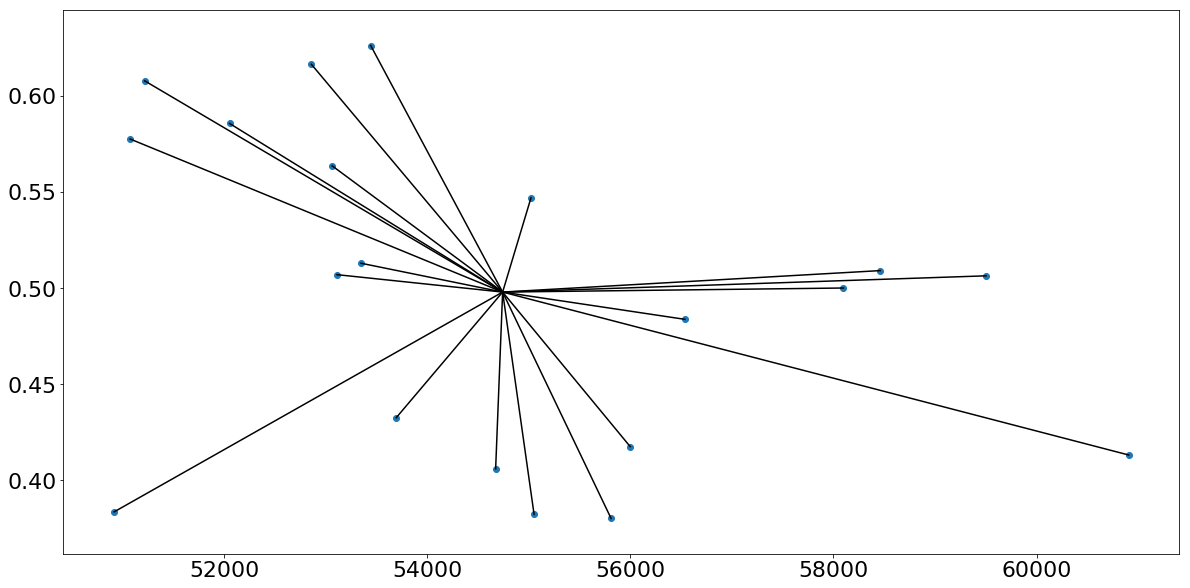

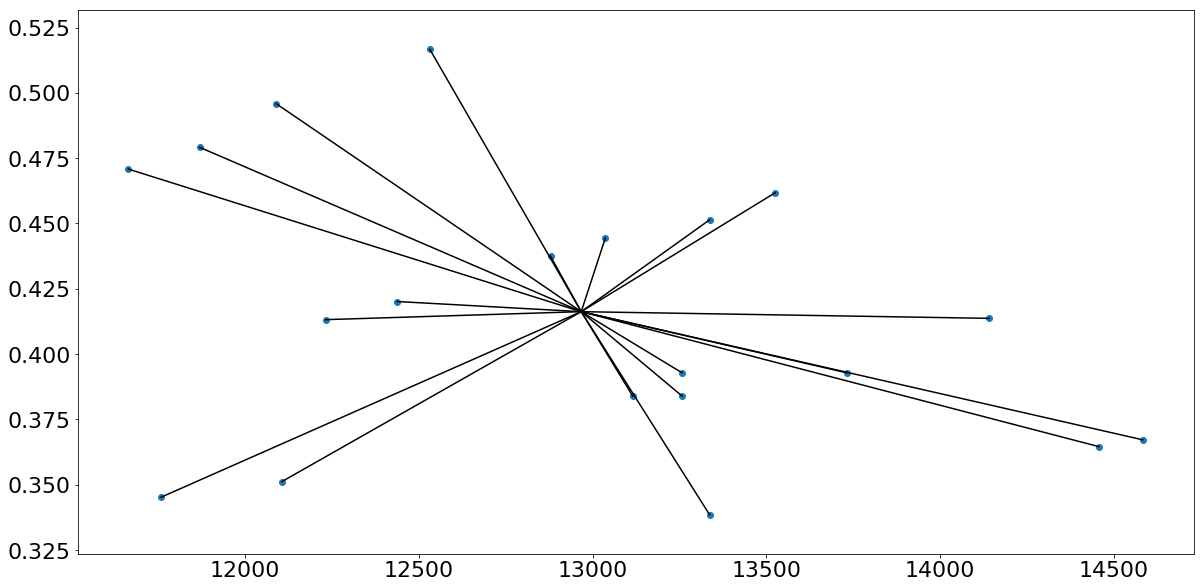

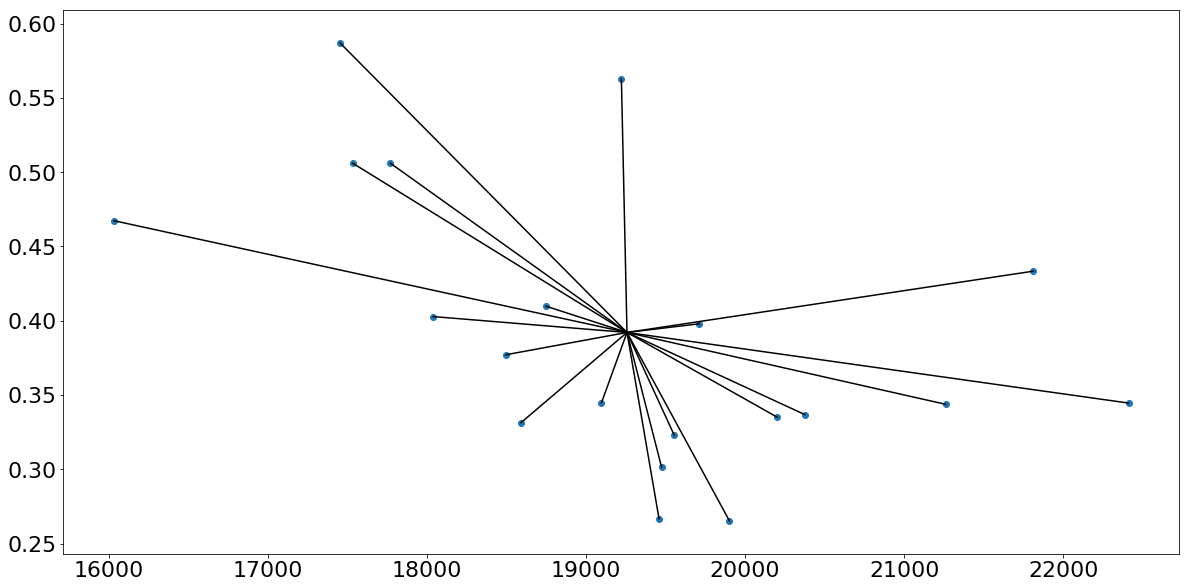

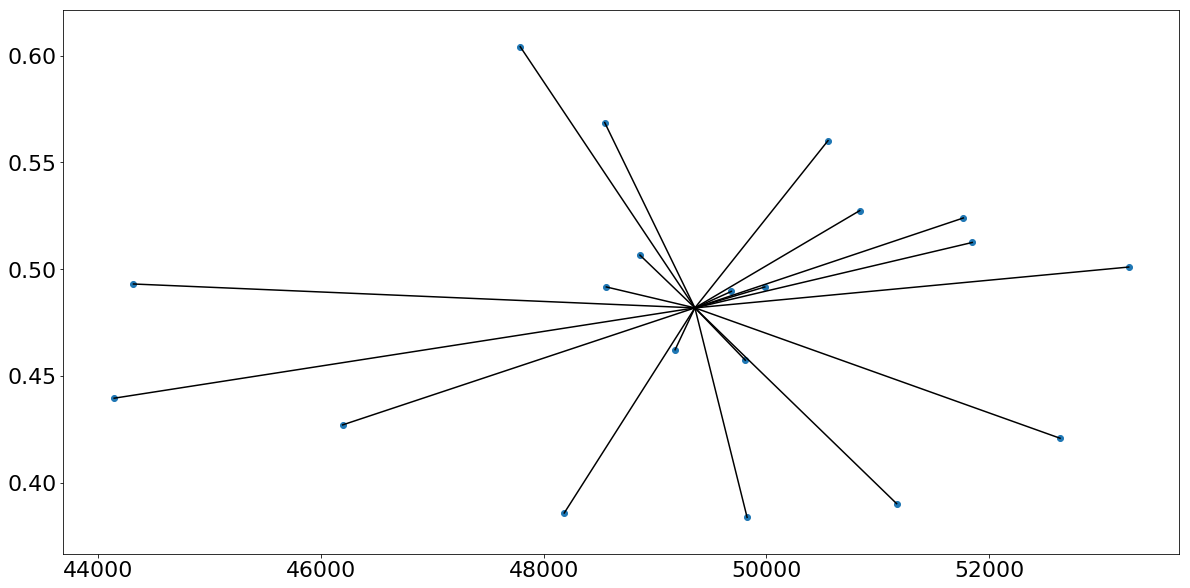

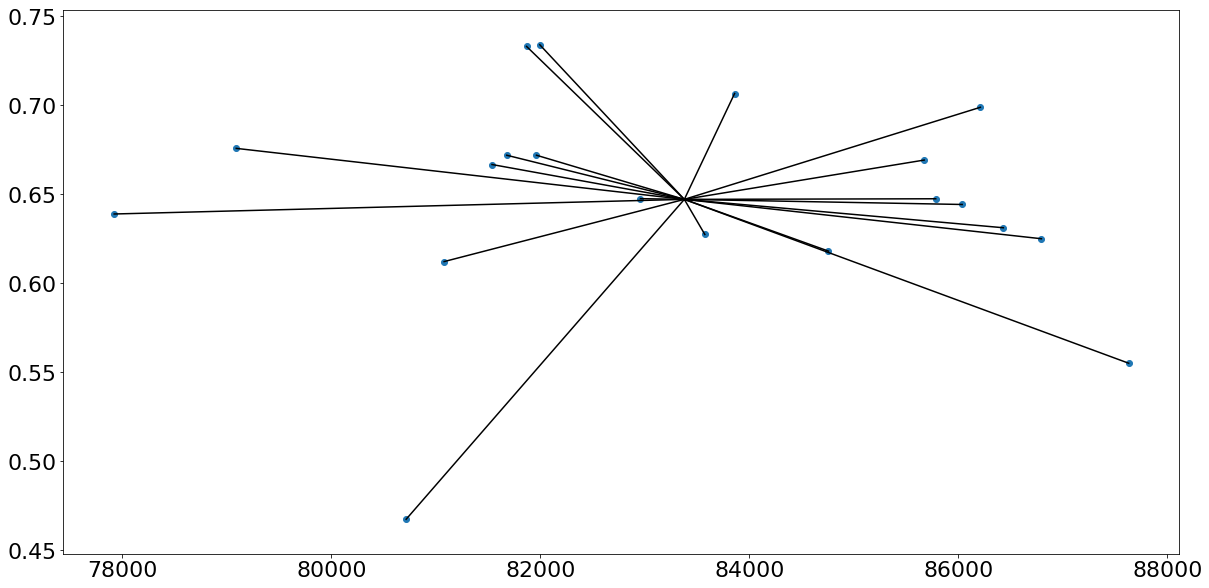

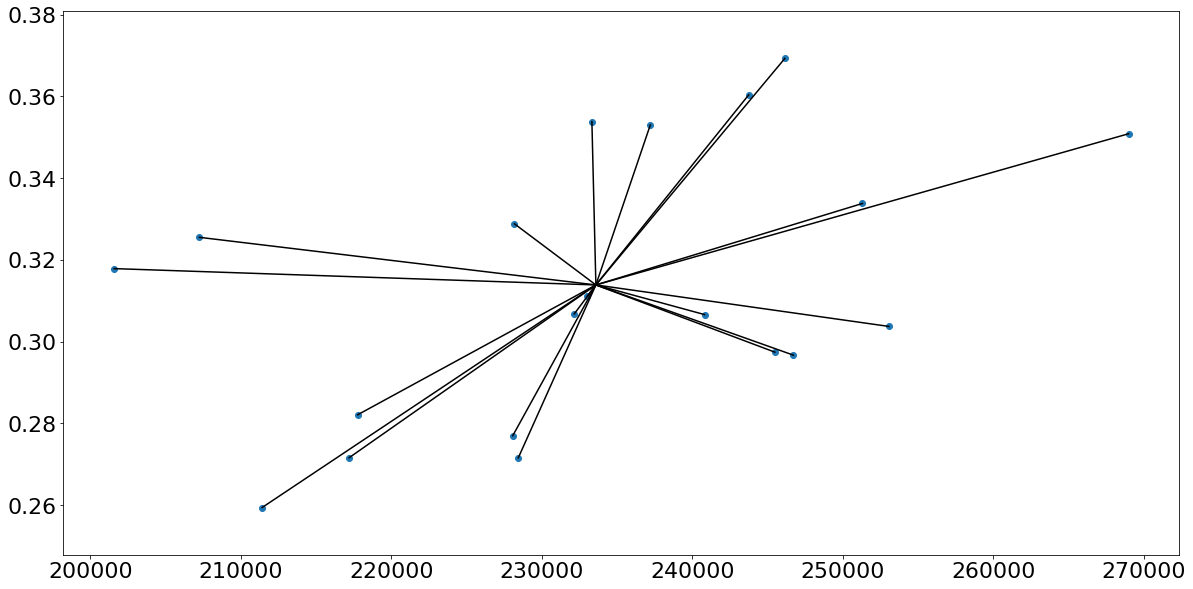

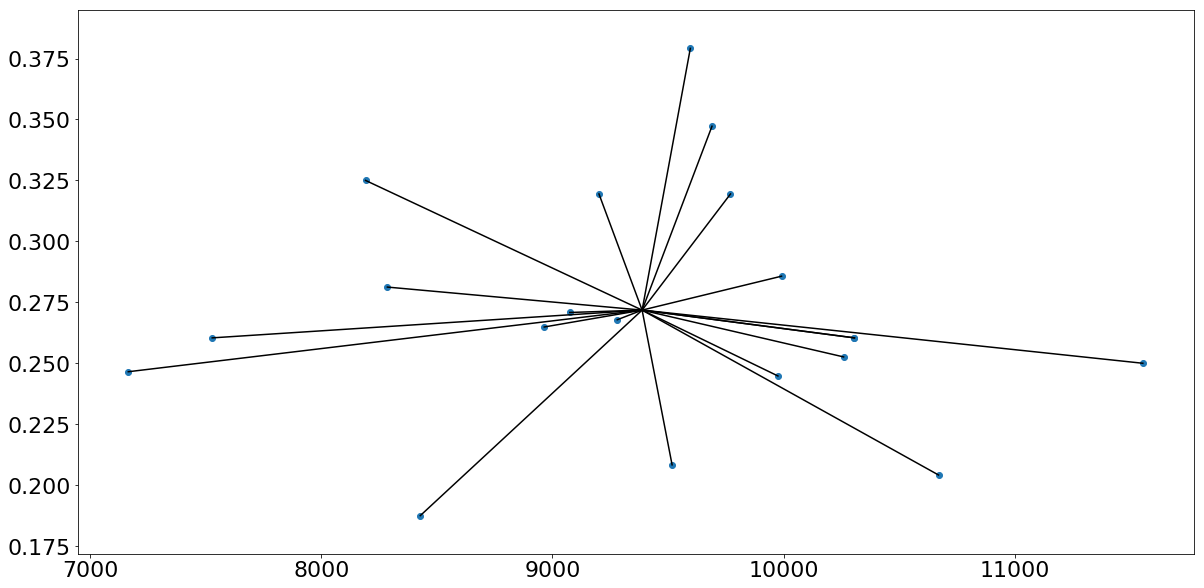

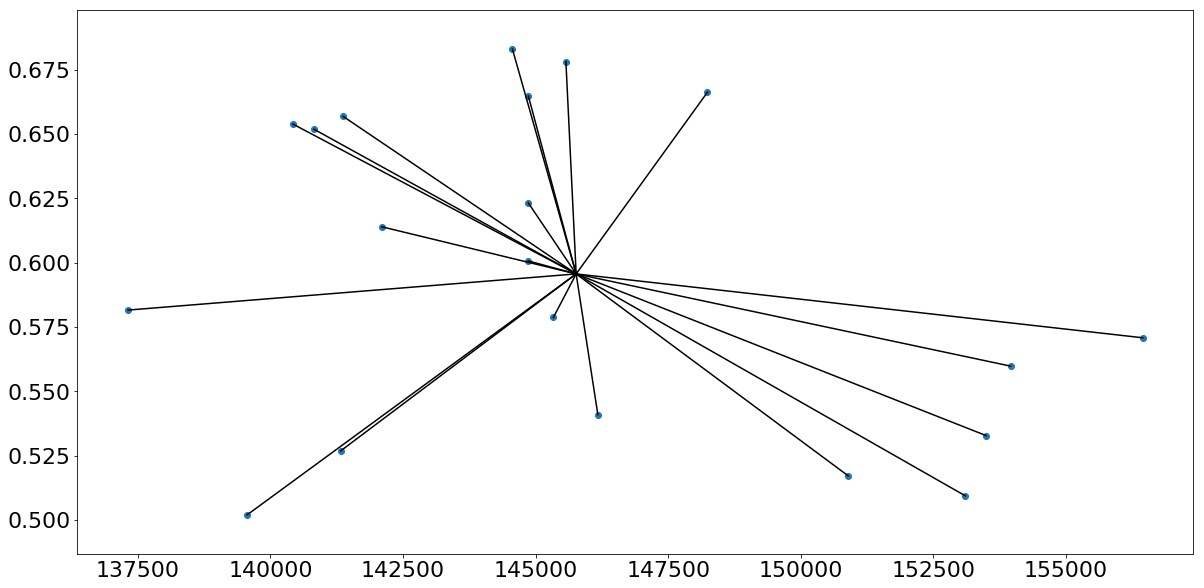

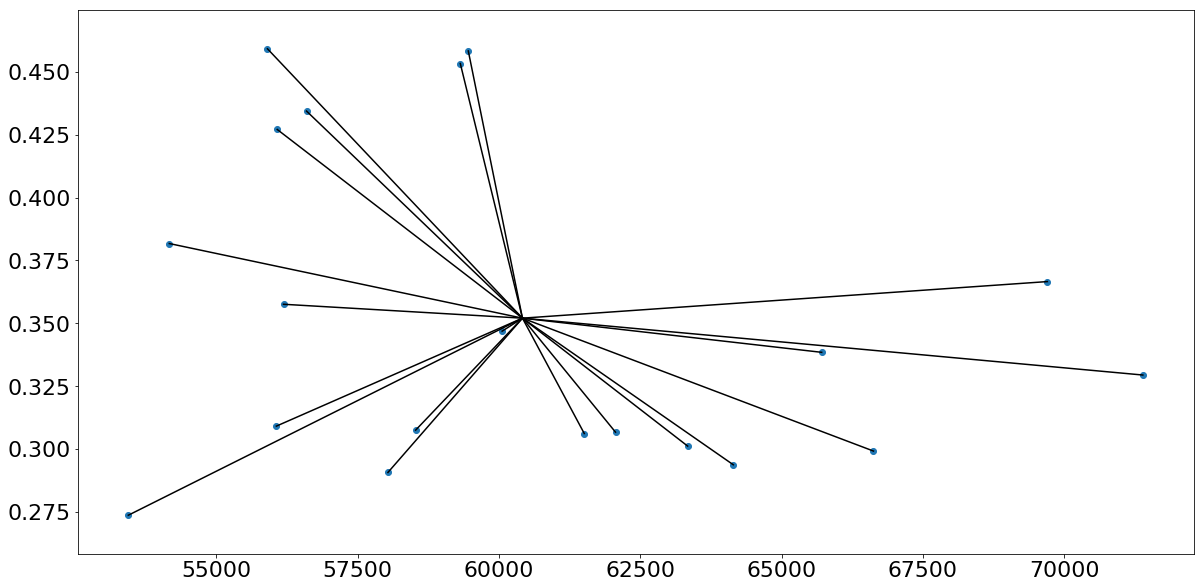

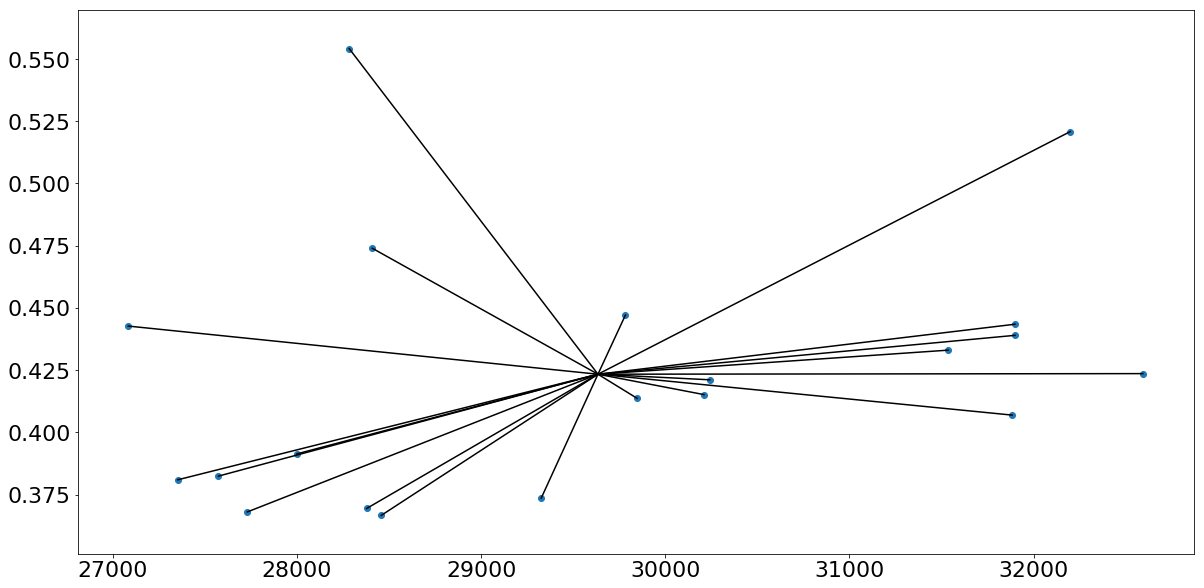

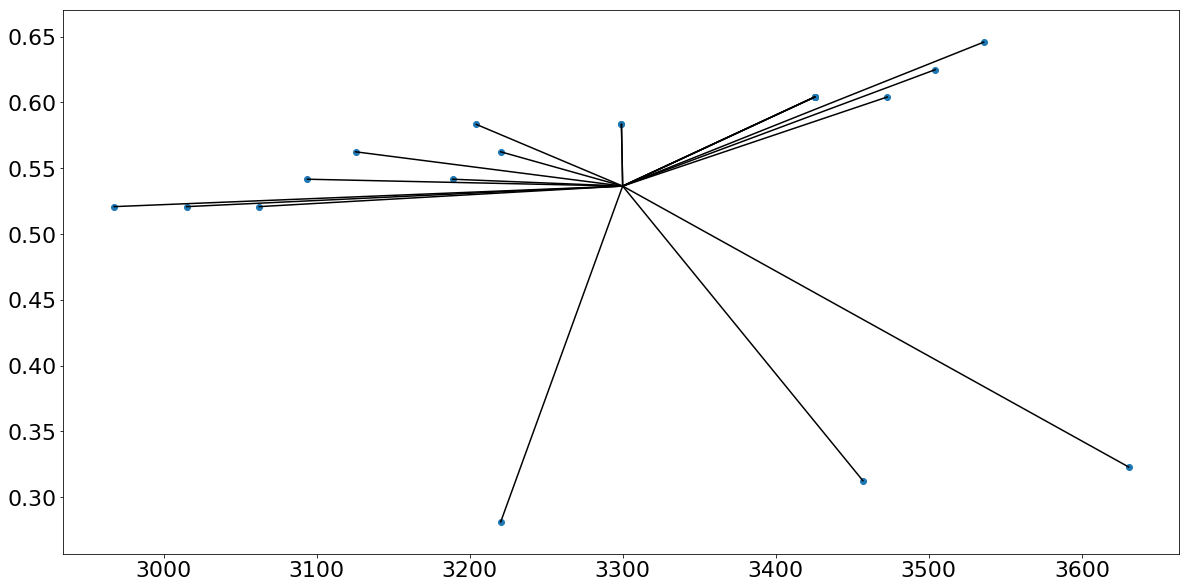

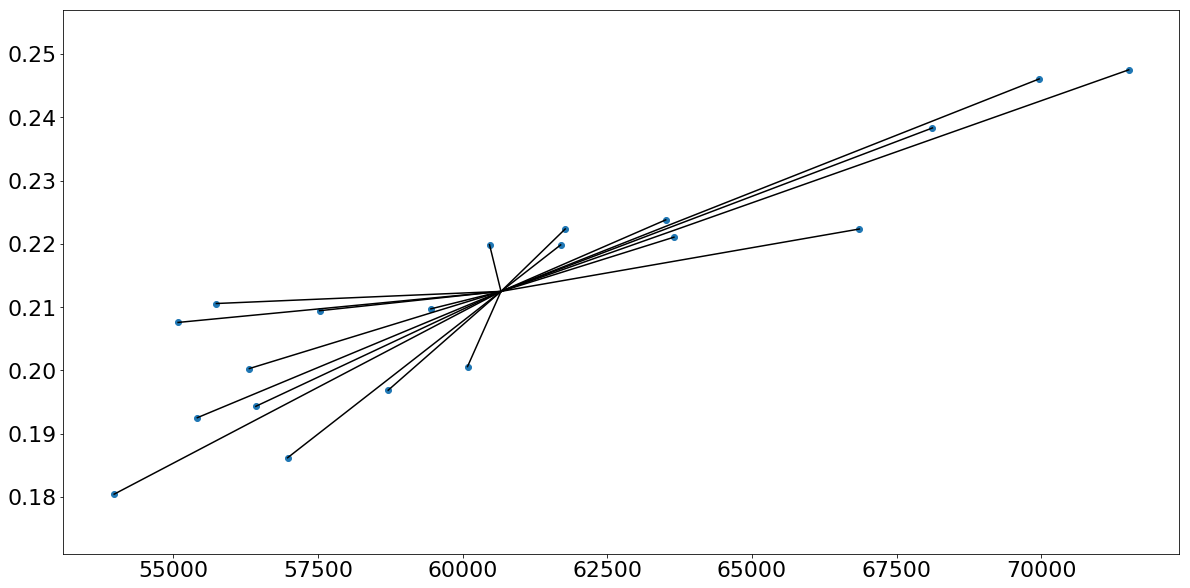

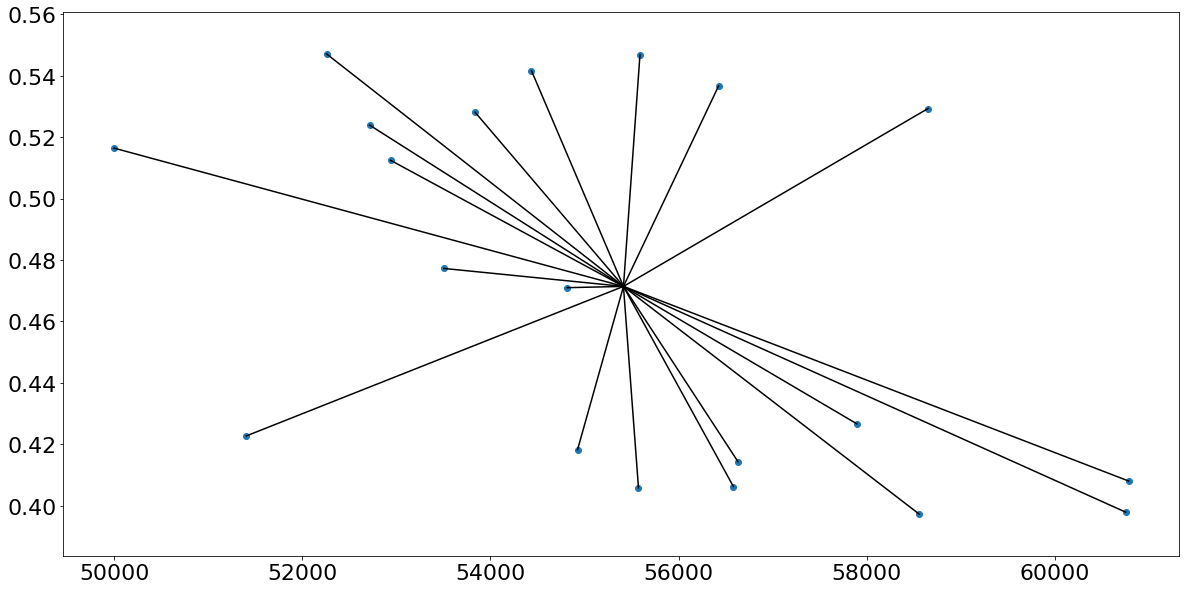

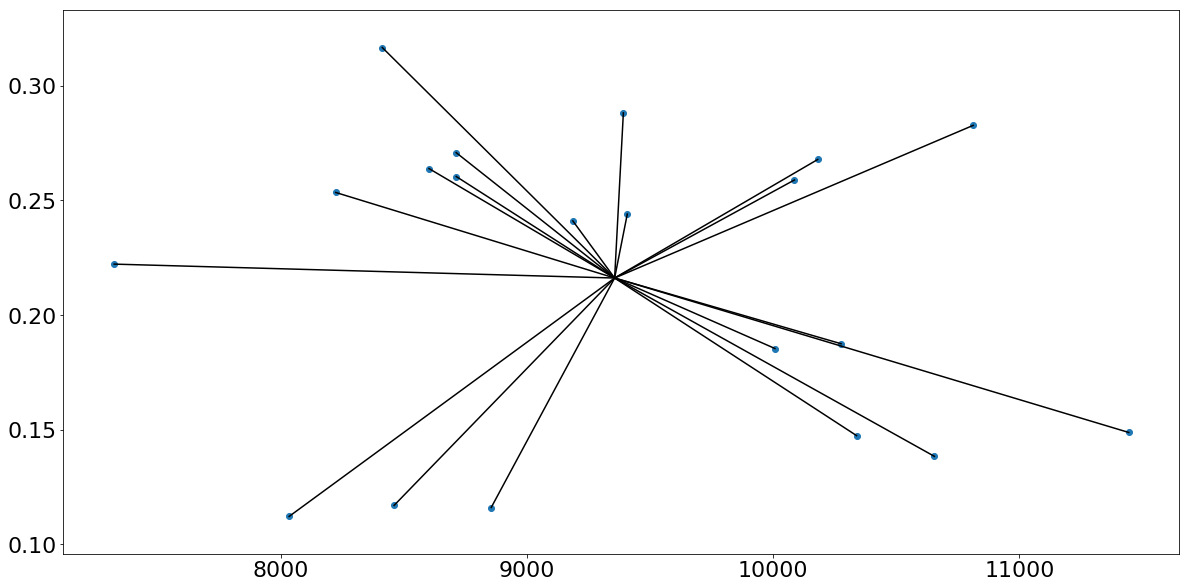

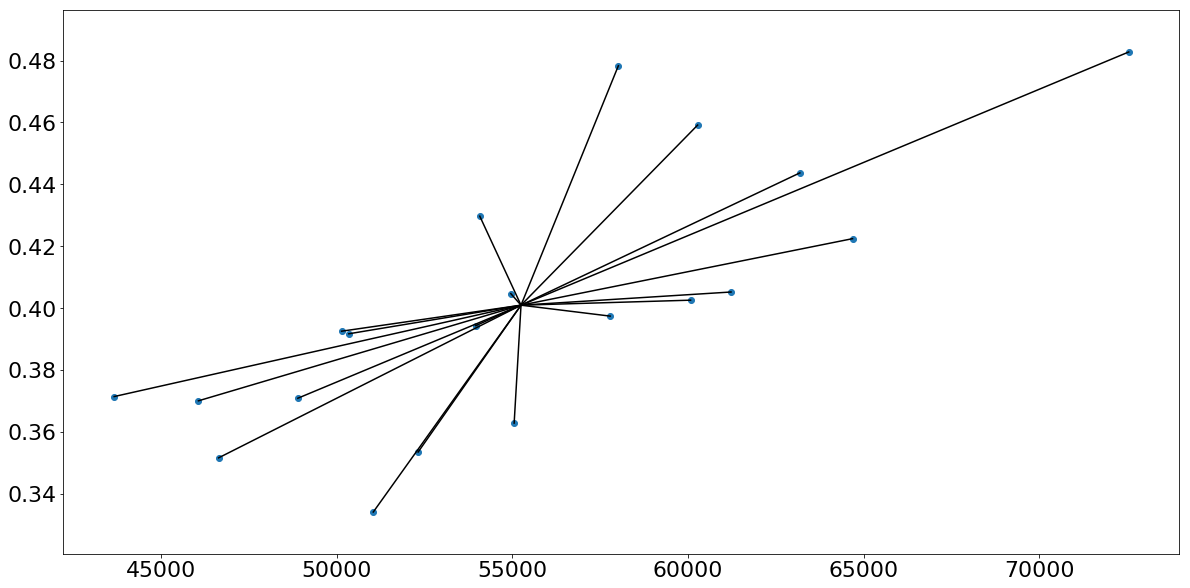

In [93]:
for AMR_id in list(dict_AMR_avg_cost_LF.keys()):
    fig, ax = plt.subplots()
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean)
    plt.show()
# x=[ dict_AMR_avg_cost_LF[x]['avg_cost'] for x in dict_AMR_avg_cost_LF]
# y=[ dict_AMR_avg_cost_LF[y]['avg_LF'] for y in dict_AMR_avg_cost_LF]
# name=[x for x in dict_AMR_avg_cost_LF]
# for i, txt in enumerate(name):
#     ax.annotate(txt, (x[i], y[i]))

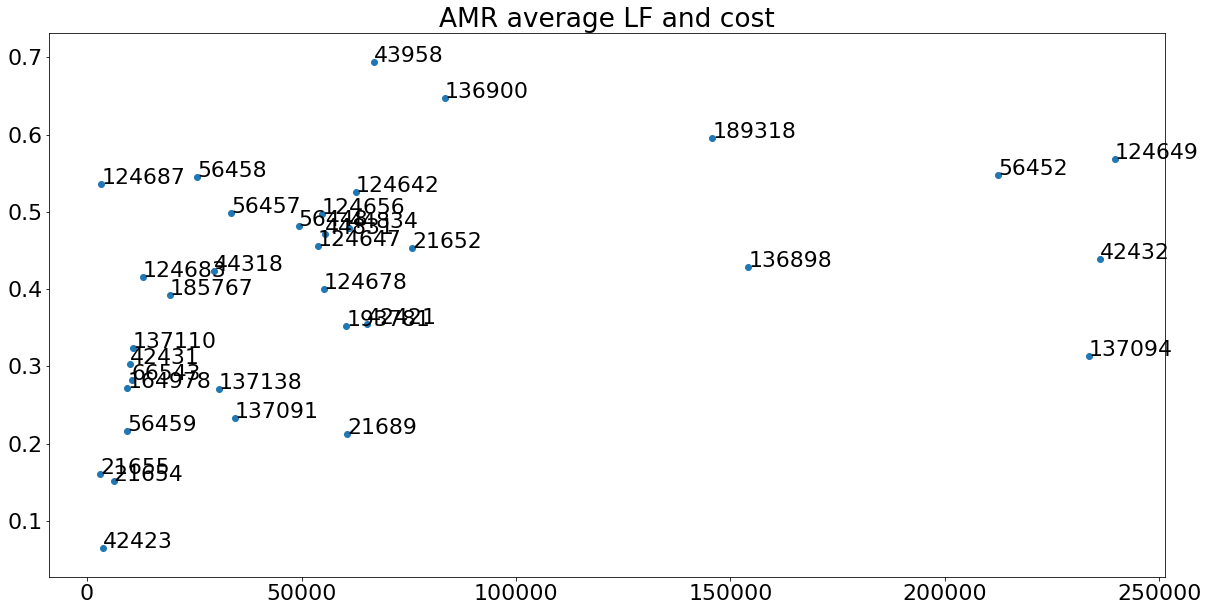

In [72]:
del dict_AMR_avg_cost_LF[42422]
x=[ dict_AMR_avg_cost_LF[x]['avg_cost'] for x in dict_AMR_avg_cost_LF]
y=[ dict_AMR_avg_cost_LF[y]['avg_LF'] for y in dict_AMR_avg_cost_LF]

fig, ax = plt.subplots()
ax.scatter(x,y)

name=[x for x in dict_AMR_avg_cost_LF]
for i, txt in enumerate(name):
    ax.annotate(txt, (x[i], y[i]))
    
    
ax.set_title('AMR average LF and cost')
plt.show()

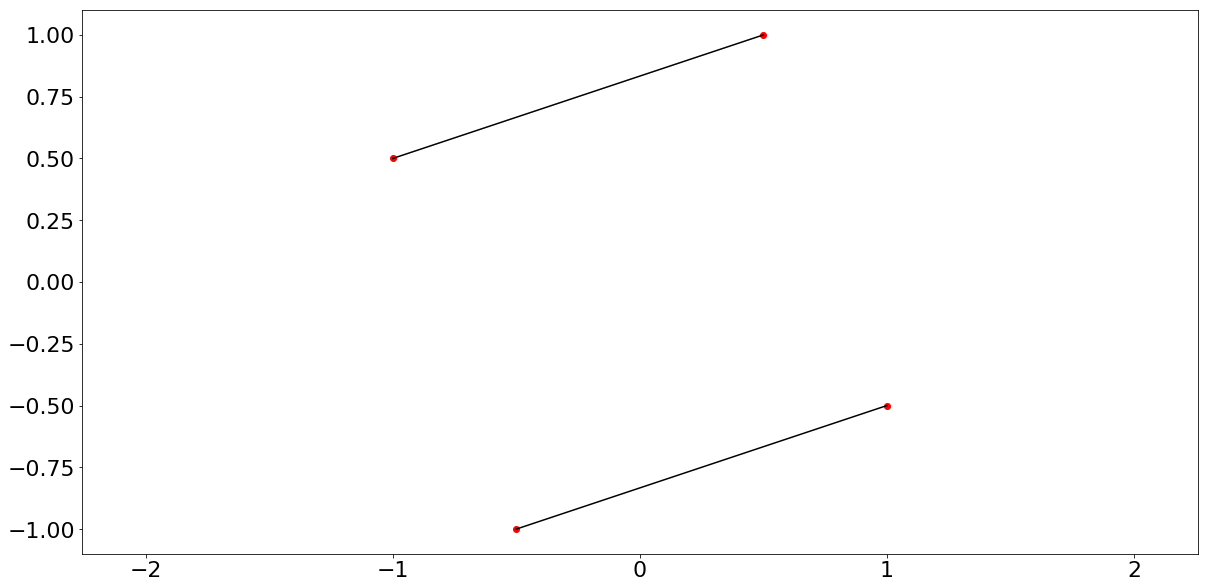

In [89]:
x=[-1 ,0.5 ,1,-0.5]
y=[ 0.5,  1, -0.5, -1]

plt.plot(x,y, 'ro')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(x,y,0,1)
connectpoints(x,y,2,3)

plt.axis('equal')
plt.show()